# **Diabetes Analysis and Prediction**

> **Teacher in charge:** ***Fabio Scielzo Ortiz***

**Email:** Fabio.scielzoortiz@gmail.com

**Web:** [Fabioscielzoortiz.com](https://fabioscielzoortiz.com/)

## **Objective Statement**

The primary objective of this project is to develop a predictive model capable of classifying individuals based on their **diabetes status**, leveraging a variety of health-related and sociodemographic factors. This endeavor seeks not only to categorize individuals as diabetic or non-diabetic but also aims to quantify the risk of diabetes through probabilistic predictions.

This constitutes a supervised learning task, wherein we employ a dataset with predefined labels **(diabetes presence or absence)** to train our model. The nature of the response variable—binary, indicating the presence or absence of diabetes—positions this as a **binary classification problem**.

To achieve these objectives, we will harness the power of **Machine Learning techniques**. These methodologies will enable us to sift through the complex interplay of variables and identify patterns that significantly contribute to the likelihood of diabetes, thus facilitating more accurate predictions and risk assessments.


## **Requirements**

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import sys
import pickle
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline as ImblearnPipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from PIL import Image
import statsmodels.api as sm
import joblib


In [2]:
sys.path.insert(0, 'C:/Users/fscielzo/Documents/DataScience-GitHub/EDA')
from EDA import dtypes_df, change_type, prop_cols_nulls, corr_matrix, outliers_table, histogram_matrix, barplot_matrix, scatter_matrix, quant_to_cat, summary, histogram, freq_table, boxplot, ecdfplot, boxplot, boxplot_matrix, boxplot_2D_matrix, stripplot_matrix, histogram_2D_matrix, ecdf_2D_matrix, cross_quant_cat_summary, contingency_table_2D, ecdf_matrix

In [3]:
sys.path.insert(0, r'C:\Users\fscielzo\Documents\DataScience-GitHub\Regression\ML')
from PyML import encoder, scaler, features_selector, imputer, SimpleEvaluation, predictive_plots, predictive_intervals, OptunaSearchCV

**Why Polars instead of Pandas?**  

https://github.com/FabioScielzoOrtiz/Spark_Master_Plot/blob/main/Spark_Pandas_Polars.jpg

In [4]:
'''
diabetes_df = pl.read_csv('diabetes_NaNs.csv')

replace_dict = {}
replace_dict['Income'] = {'1.0': '[0, 10k)', '2.0': '[10k,15k)', '3.0': '[15k, 20k)',
                          '4.0': '[20k,25k)', '5.0': '[25k,35k)', '6.0': '[35k,50k)', 
                          '7.0': '[50k,75k)', '8.0': '[75k, inf)'}
replace_dict['Education'] = {'1.0': 'Never', '2.0': 'Elementary', '3.0': 'SomeHighSchool',
                          '4.0': 'HighSchool', '5.0': 'SomeCollege', '6.0': 'CollegeGraduate'}
replace_dict['Age'] = {'1.0': '[18, 25)', '2.0': '[25,30)', '3.0': '[30,35)',
                       '4.0': '[35,40)', '5.0': '[40,45)', '6.0': '[45,50)', '7.0': '[50,55)',
                       '8.0': '[55,60)', '9.0': '[60,65)', '10.0': '[65,70)', '11.0': '[70,75)',
                       '12.0': '[75,80)', '13.0': '[80,inf)'}
replace_dict['Sex'] = {'0.0': 'Female', '1.0': 'Male'}
replace_dict['DiffWalk'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['GenHlth'] = {'0.0': 'Excellent', '1.0': 'VeryGood', '2.0': 'Good',
                          '3.0': 'Fair', '4.0': 'Poor'}
replace_dict['NoDocbcCost'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['AnyHealthcare'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['HvyAlcoholConsump'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['Veggies'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['Fruits'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['PhysActivity'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['HeartDiseaseorAttack'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['Stroke'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['Smoker'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['CholCheck'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['HighChol'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['HighBP'] = {'0.0': 'No', '1.0': 'Yes'}
replace_dict['Diabetes_binary'] = {'0.0': 'No', '1.0': 'Yes'}

for col in replace_dict.keys():
    diabetes_df = diabetes_df.with_columns(diabetes_df[col].cast(str).alias(col))
    diabetes_df = diabetes_df.with_columns(pl.col(col).replace(replace_dict[col]).alias(col))

# diabetes_df.write_csv('diabetes_session03.csv')
'''

"\ndiabetes_df = pl.read_csv('diabetes_NaNs.csv')\n\nreplace_dict = {}\nreplace_dict['Income'] = {'1.0': '[0, 10k)', '2.0': '[10k,15k)', '3.0': '[15k, 20k)',\n                          '4.0': '[20k,25k)', '5.0': '[25k,35k)', '6.0': '[35k,50k)', \n                          '7.0': '[50k,75k)', '8.0': '[75k, inf)'}\nreplace_dict['Education'] = {'1.0': 'Never', '2.0': 'Elementary', '3.0': 'SomeHighSchool',\n                          '4.0': 'HighSchool', '5.0': 'SomeCollege', '6.0': 'CollegeGraduate'}\nreplace_dict['Age'] = {'1.0': '[18, 25)', '2.0': '[25,30)', '3.0': '[30,35)',\n                       '4.0': '[35,40)', '5.0': '[40,45)', '6.0': '[45,50)', '7.0': '[50,55)',\n                       '8.0': '[55,60)', '9.0': '[60,65)', '10.0': '[65,70)', '11.0': '[70,75)',\n                       '12.0': '[75,80)', '13.0': '[80,inf)'}\nreplace_dict['Sex'] = {'0.0': 'Female', '1.0': 'Male'}\nreplace_dict['DiffWalk'] = {'0.0': 'No', '1.0': 'Yes'}\nreplace_dict['GenHlth'] = {'0.0': 'Excellent', '1

## **Introduction**

Diabetes stands as a paramount challenge within the realm of public health in the United States, affecting millions and imposing a considerable economic toll. This chronic condition undermines the body's ability to regulate blood glucose levels effectively, which is critical for energy production and overall health. Following digestion, the breakdown of foods into sugars results in their release into the bloodstream, triggering the pancreas to secrete insulin. This hormone is essential for cells to utilize blood sugar for energy. The hallmark of diabetes is the body's inadequate insulin production or utilization, leading to potential reductions in both quality of life and life expectancy.

The disease is associated with severe complications, including heart disease, vision loss, lower-limb amputations, and kidney disease, stemming from prolonged elevated blood sugar levels. Although incurable, diabetes management strategies—such as weight management, healthy eating, physical activity, and medical treatment—can significantly reduce its adverse effects. Early detection is crucial, enabling lifestyle modifications and enhanced treatment effectiveness, thus underscoring the importance of predictive models for assessing diabetes risk.

Acknowledging the magnitude of diabetes is vital. The Centers for Disease Control and Prevention (CDC) reports that, as of 2018, approximately 34.2 million Americans live with diabetes, and an additional 88 million are in a prediabetic state. Alarmingly, a significant proportion of individuals with diabetes or prediabetes remain unaware of their condition, with estimates suggesting that 1 in 5 diabetics and nearly 80% of prediabetics are undiagnosed. While diabetes manifests in various forms, type II diabetes is the most prevalent, influenced by a range of factors including age, education, income, geographic location, race, and other social determinants of health. The socioeconomic disparity in diabetes prevalence is noteworthy, disproportionately affecting those of lower socioeconomic status.

The economic implications of diabetes are staggering, with direct medical costs for diagnosed diabetes reaching approximately $327 billion annually. When accounting for undiagnosed diabetes and prediabetes, total expenditures near $400 billion, highlighting the urgent need for effective public health strategies and interventions to combat this escalating health crisis.

## **Data**

The Behavioral Risk Factor Surveillance System (BRFSS), an annual health-related telephone survey administered by the Centers for Disease Control and Prevention (CDC), systematically gathers data from over 400,000 Americans. This comprehensive survey, initiated in 1984, explores health-related risk behaviors, chronic health conditions, and the utilization of preventive services. 

For the purposes of this study, we have utilized a subset of the BRFSS 2015 dataset, made available on Kaggle. This specific subset encompasses responses from 441,455 participants and includes a rich array of 330 features. These features comprise direct questions posed to respondents as well as derived variables calculated from the responses of individual participants.

The [dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) in question encapsulates 250,000 responses from the 2015 iteration of the CDC's BRFSS and features 22 variables meticulously extracted from the survey. The variables included offer a comprehensive overview of the participants' health status and behaviors, serving as the foundation for this project's analysis. The table below conceptually summarizes the variables within the dataset, delineating the scope of our exploration and analysis throughout this project.

| Variable Name | Description | Type |
|----------|----------|----------|
| `Diabetes`    | 0 = no diabetes ; 1 = prediabetes or diabetes   | Binary   |
| `HighBP`    | 0 = no high blood pressure ; 1 = high blood pressure  | Binary  |
| `HighChol`   |  0 = no high cholesterol ; 1 = high cholesterol   |  Binary  |
|  `CholCheck`   |  0 = no cholesterol check in 5 years ; 1 = yes cholesterol check in 5 years  |  Binary  |
| `BMI` |   Body Mass Index  |  Quantitative  |
| `Smoker`   |  Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no ; 1 = yes  | Binary  |
|  `Stroke`  |  Have you had a stroke (ictus). 0 = no ; 1 = yes  | Binary  |
|  `HeartDiseaseorAttack`   |  coronary heart disease (CHD) or myocardial infarction (MI). 0 = no ; 1 = yes   |  Binary  |
| `PhysActivity`   | physical activity in past 30 days - not including job. 0 = no ; 1 = yes   | Binary   |
|  `Fruits`  |  Consume Fruit 1 or more times per day. 0 = no ; 1 = yes | Binary  |
|   `Veggies`      |  Consume Vegetables 1 or more times per day. 0 = no ; 1 = yes   | Binary  |
| `HvyAlcoholConsump`   |  (adult men >=14 drinks per week and adult women>=7 drinks per week). 0 = no ; 1 = yes | Binary   |
| `AnyHealthcare`   |  Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no ; 1 = yes  |  Binary  |
| `NoDocbcCost`  |  Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no ; 1 = yes  |  Binary  |
|  `GenHlth`  |  Would you say that in general your health is: scale 1-5. 1 = excellent ; 2 = very good ; 3 = good ; 4 = fair ; 5 = poor  |  Multiclass  |
|  `MentHlth`  | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days  |  Quantitative |
|  `PhysHlth`  | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days  |  Quantitative  |
| `DiffWalk` |  Do you have serious difficulty walking or climbing stairs? 0 = no ; 1 = yes   | Binary    |
|  `Sex`  |   0 = female ; 1 = male  |  Binary   |
|  `Age`  |  13-level age category. 0 = [18, 24] ; 1 = [25 ,29 ]   ; 2 = [30 ,34 ]   ; 3 = [35 ,39 ]    ; 4 = [40 , 44]    ; 5 = [ 45, 49]    ; 6 = [50 , 54]    ; 7 = [55 , 59]    ; 8 = [60 , 64]  ; 9 = [65 , 69] ; 10 = [70 , 74]  ; 11 = [75 , 79]  ; 12 = 80 or older  |  Multiclass   |
| `Education`   |  Education level scale 0-5. 0 = Never attended school or only kindergarten ; 1 = Elementary ; 2 = Some high school ; 3 = High school graduate ; 4 = Some college or technical school ; 5 = College graduate   |   Multiclass  |
| `Income` | Income scale scale 0-7. 0 = lower than 10k ; 1 = [10k, 15k) ; 2 = [15k, 20k) ; 3 = [20k, 25k) ; 4 = [25k, 35k) ; 5 = [35k, 50k) ; 6 = [50k, 75k) ; 7 = higher than 75k | Multiclass |

The data has been obtained from `Kaggle`:  https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

### **Reading**

First of all, we read the data.

In [5]:
diabetes_df = pl.read_csv('diabetes_session03.csv')

In [6]:
diabetes_df.head()

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str,str,str,str
"""No""","""Yes""","""Yes""","""Yes""",40.0,"""Yes""","""No""","""No""","""No""","""No""","""Yes""","""No""","""Yes""","""No""","""5.0""",18.0,15.0,"""Yes""","""Female""","""[60,65)""","""HighSchool""","""[15k, 20k)"""
"""No""","""No""","""No""","""No""",25.0,"""Yes""","""No""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Yes""","""Fair""",0.0,0.0,"""No""","""Female""","""[50,55)""","""CollegeGraduat…","""[0, 10k)"""
"""No""","""Yes""","""Yes""","""Yes""",28.0,"""No""","""No""","""No""","""No""","""Yes""","""No""","""No""","""Yes""","""Yes""","""5.0""",30.0,30.0,"""Yes""","""Female""","""[60,65)""","""HighSchool""","""[75k, inf)"""
"""No""","""Yes""","""No""","""Yes""",27.0,"""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""No""","""Yes""","""No""","""Good""",0.0,0.0,"""No""","""Female""","""[70,75)""","""SomeHighSchool…","""[35k,50k)"""
"""No""","""Yes""","""Yes""","""Yes""",24.0,"""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""No""","""Yes""","""No""","""Good""",3.0,0.0,"""No""","""Female""","""[70,75)""","""SomeCollege""","""[20k,25k)"""


### **Shape**

We display the shape of the data.


In [7]:
diabetes_df.shape

(253680, 22)

### **Data types**

We check the variables data types according to `polars` structure.

In [8]:
with pl.Config(tbl_rows=22):
    print(dtypes_df(df=diabetes_df))

shape: (22, 2)
┌──────────────────────┬─────────────┐
│ Columns              ┆ Python_type │
│ ---                  ┆ ---         │
│ str                  ┆ object      │
╞══════════════════════╪═════════════╡
│ Diabetes_binary      ┆ Utf8        │
│ HighBP               ┆ Utf8        │
│ HighChol             ┆ Utf8        │
│ CholCheck            ┆ Utf8        │
│ BMI                  ┆ Float64     │
│ Smoker               ┆ Utf8        │
│ Stroke               ┆ Utf8        │
│ HeartDiseaseorAttack ┆ Utf8        │
│ PhysActivity         ┆ Utf8        │
│ Fruits               ┆ Utf8        │
│ Veggies              ┆ Utf8        │
│ HvyAlcoholConsump    ┆ Utf8        │
│ AnyHealthcare        ┆ Utf8        │
│ NoDocbcCost          ┆ Utf8        │
│ GenHlth              ┆ Utf8        │
│ MentHlth             ┆ Float64     │
│ PhysHlth             ┆ Float64     │
│ DiffWalk             ┆ Utf8        │
│ Sex                  ┆ Utf8        │
│ Age                  ┆ Utf8        │
│ Educatio

### **Unique values**

We compute the unique values of each variable, what is useful to get a more real idea of their nature.

In [9]:
n_unique = {}
print('Number of unique values:\n')
for col in diabetes_df.columns :
     n_unique[col] = len(diabetes_df[col].unique())
     print(col, ':', n_unique[col])

Number of unique values:

Diabetes_binary : 2
HighBP : 2
HighChol : 2
CholCheck : 3
BMI : 84
Smoker : 2
Stroke : 2
HeartDiseaseorAttack : 2
PhysActivity : 2
Fruits : 2
Veggies : 3
HvyAlcoholConsump : 2
AnyHealthcare : 2
NoDocbcCost : 3
GenHlth : 5
MentHlth : 32
PhysHlth : 32
DiffWalk : 2
Sex : 3
Age : 14
Education : 6
Income : 8


In [10]:
for col in diabetes_df.columns :
    display(diabetes_df[col].unique())

Diabetes_binary
str
"""Yes"""
"""No"""


HighBP
str
"""No"""
"""Yes"""


HighChol
str
"""No"""
"""Yes"""


CholCheck
str
"""No"""
null
"""Yes"""


BMI
f64
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


Smoker
str
"""Yes"""
"""No"""


Stroke
str
"""Yes"""
"""No"""


HeartDiseaseorAttack
str
"""Yes"""
"""No"""


PhysActivity
str
"""Yes"""
"""No"""


Fruits
str
"""No"""
"""Yes"""


Veggies
str
"""Yes"""
"""No"""
null


HvyAlcoholConsump
str
"""Yes"""
"""No"""


AnyHealthcare
str
"""No"""
"""Yes"""


NoDocbcCost
str
"""Yes"""
null
"""No"""


GenHlth
str
"""Poor"""
"""Fair"""
"""VeryGood"""
"""5.0"""
"""Good"""


MentHlth
f64
null
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


PhysHlth
f64
null
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0


DiffWalk
str
"""No"""
"""Yes"""


Sex
str
"""Female"""
"""Male"""
null


Age
str
"""[60,65)"""
"""[30,35)"""
"""[65,70)"""
"""[75,80)"""
"""[50,55)"""
"""[80,inf)"""
null
"""[40,45)"""
"""[35,40)"""


Education
str
"""HighSchool"""
"""Elementary"""
"""SomeHighSchool…"
"""CollegeGraduat…"
"""SomeCollege"""
"""Never"""


Income
str
"""[50k,75k)"""
"""[75k, inf)"""
"""[10k,15k)"""
"""[0, 10k)"""
"""[35k,50k)"""
"""[20k,25k)"""
"""[15k, 20k)"""
"""[25k,35k)"""


### **Missing values**

Let's get a general idea of our missing values.

In [11]:
prop_cols_nulls(diabetes_df)

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.023372,0.0,0.0,0.0,0.0,0.0,0.0,0.067412,0.0,0.0,0.001336,0.0,0.029675,0.026565,0.0,0.011337,0.04188,0.0,0.0


The proportion of missing values is quite low but it will then be decided whether to impute or eliminate the observations containing any of these.

## **EDA**

In this section we are going to do describe the variables of our data.

### **Descriptive summary**

First we define the list of the categorical and quantitative variables.

In [12]:
quant_columns = [col for col in diabetes_df.columns if diabetes_df[col].dtype == pl.Float64]
cat_columns = [col for col in diabetes_df.columns if diabetes_df[col].dtype == pl.Utf8]

In [13]:
# Alternative 

'''
len_unique = []
columns_df = np.array(diabetes_df.columns)
for col in columns_df :
    len_unique.append(len(diabetes_df[col].unique()))
len_unique = np.array(len_unique)

binary_columns = columns_df[len_unique == 2].tolist()
multi_columns = columns_df[(len_unique > 2) & (len_unique <= 14)].tolist()
cat_columns = binary_columns + multi_columns
quant_columns = columns_df[len_unique > 14].tolist()
'''

'\nlen_unique = []\ncolumns_df = np.array(diabetes_df.columns)\nfor col in columns_df :\n    len_unique.append(len(diabetes_df[col].unique()))\nlen_unique = np.array(len_unique)\n\nbinary_columns = columns_df[len_unique == 2].tolist()\nmulti_columns = columns_df[(len_unique > 2) & (len_unique <= 14)].tolist()\ncat_columns = binary_columns + multi_columns\nquant_columns = columns_df[len_unique > 14].tolist()\n'

In [14]:
quant_columns

['BMI', 'MentHlth', 'PhysHlth']

In [15]:
cat_columns

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

We will use the function `summary` to obtain a descriptive summary of both the categorical and quantitative variables.

This function give us a table with useful metrics for both quantitative and categorical variables.

For quantitative the following metrics are computed:

- `n_unique`: number of unique values of the variable.

- `prop_nan`: proportion of missing values of the variable.

- `mean`: mean of the variable.

- `std`: standard deviation of the variable.

- `min`: minimum value of the variable.

- `Q10`: 10-quantile of the variable.

- `Q25`: 25-quantile of the variable.

- `median`:

- `Q75`: 75-quantile of the variable.

- `Q90`: 90-quantile of the variable.

- `max`: maximum value of the variable.

- `kurtosis`: the kurtosis of the variable. 

- `skew`: the skewness of the variable.

- `n_outliers`: the number of outlier observations of the variable. 

- `n_not_outliers`: the number of not outlier observations of the variable.

- `prop_outliers`: the proportion of outlier observations of the variable.

- `prop_not_outliers`: the proportion of not outlier observations of the variable.

And for categorical, the following:

- `n_unique`: number of unique values of the variable.

- `prop_nan`: proportion of missing values of the variable.

- `mode`: the mode of the variable.


In [16]:
quant_summary, cat_summary = summary(df=diabetes_df, auto_col=False,
                                     quant_col_names=quant_columns,
                                     cat_col_names=cat_columns)

In [17]:
quant_summary

,BMI,MentHlth,PhysHlth
n_unique,84,32,32
prop_nan,0.0,0.029675,0.026565
mean,28.382364,3.185739,4.244253
std,6.608694,7.414006,8.720454
min,12.0,0.0,0.0
Q10,22.0,0.0,0.0
Q25,24.0,0.0,0.0
median,27.0,0.0,0.0
Q75,31.0,2.0,3.0
Q90,36.0,10.0,20.0


In [18]:
cat_summary

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
n_unique,2,2,2,2,2,2,2,2,2,2,2,2,2,5,2,2,13,6,8
prop_nan,0.0,0.0,0.0,0.023372,0.0,0.0,0.0,0.0,0.0,0.067412,0.0,0.0,0.001336,0.0,0.0,0.011337,0.04188,0.0,0.0
mode,No,No,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,Good,No,Female,"[60,65)",CollegeGraduate,"[75k, inf)"


### **Outliers**

Next, we employ the `outliers_table` function to generate a table encompassing various metrics related to outliers within the quantitative variables.

In [19]:
outliers_table(df=diabetes_df, auto=False, col_names=quant_columns)

quant_variables,lower_bound,upper_bound,n_outliers,n_not_outliers,prop_outliers,prop_not_outliers
str,f64,f64,i64,i64,f64,f64
"""BMI""",13.5,41.5,9847,243833,0.038817,0.961183
"""MentHlth""",-3.0,5.0,35146,211006,0.142782,0.857218
"""PhysHlth""",-4.5,7.5,39877,207064,0.161484,0.838516


This table contain the lower and upper bound from which the outliers are defined, as well as the number and proportion of outliers and not outlier observation of each quantitative variable.

### **Frequency table**

Here we compute a frequency table for each categorical variable.

In [20]:
diabetes_df_non_cat_NaNs = diabetes_df.drop_nulls(subset=cat_columns)

In [21]:
for x in cat_columns:
    try:
        display(freq_table(X=diabetes_df_non_cat_NaNs[x]))  
    except:
        print(f'Couldn\'t be computed for {x}.')


Diabetes_binary: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",188001,0.8603,188001,0.860283
"""Yes""",30533,0.1397,218534,1.0


HighBP: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",124818,0.5712,124818,0.571161
"""Yes""",93716,0.4288,218534,1.0


HighChol: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",125796,0.5756,125796,0.575636
"""Yes""",92738,0.4244,218534,1.0


CholCheck: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",8150,0.0373,8150,0.037294
"""Yes""",210384,0.9627,218534,1.0


Smoker: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",121774,0.5572,121774,0.557231
"""Yes""",96760,0.4428,218534,1.0


Stroke: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",209632,0.9593,209632,0.959265
"""Yes""",8902,0.0407,218534,1.0


HeartDiseaseorAttack: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",197971,0.9059,197971,0.905905
"""Yes""",20563,0.0941,218534,1.0


PhysActivity: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",53302,0.2439,53302,0.243907
"""Yes""",165232,0.7561,218534,1.0


Fruits: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",79866,0.3655,79866,0.365463
"""Yes""",138668,0.6345,218534,1.0


Veggies: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",41320,0.1891,41320,0.189078
"""Yes""",177214,0.8109,218534,1.0


HvyAlcoholConsump: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",206254,0.9438,206254,0.943807
"""Yes""",12280,0.0562,218534,1.0


AnyHealthcare: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",10705,0.049,10705,0.048986
"""Yes""",207829,0.951,218534,1.0


NoDocbcCost: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",200146,0.9159,200146,0.915857
"""Yes""",18388,0.0841,218534,1.0


GenHlth: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""5.0""",10377,0.0475,10377,0.047485
"""Fair""",65144,0.2981,75521,0.34558
"""Good""",76805,0.3515,152326,0.697036
"""Poor""",27183,0.1244,179509,0.821424
"""VeryGood""",39025,0.1786,218534,1.0


DiffWalk: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""No""",181758,0.8317,181758,0.831715
"""Yes""",36776,0.1683,218534,1.0


Sex: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""Female""",122388,0.56,122388,0.560041
"""Male""",96146,0.44,218534,1.0


Age: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""[18, 25)""",4920,0.0225,4920,0.022514
"""[25,30)""",6507,0.0298,11427,0.052289
"""[30,35)""",9603,0.0439,21030,0.096232
"""[35,40)""",11917,0.0545,32947,0.150764
"""[40,45)""",13914,0.0637,46861,0.214433
"""[45,50)""",17104,0.0783,63965,0.2927
"""[50,55)""",22666,0.1037,86631,0.396419
"""[55,60)""",26541,0.1215,113172,0.517869
"""[60,65)""",28624,0.131,141796,0.648851


Education: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""CollegeGraduat…",92442,0.423,92442,0.42301
"""Elementary""",3455,0.0158,95897,0.43882
"""HighSchool""",54003,0.2471,149900,0.685934
"""Never""",146,0.0007,150046,0.686603
"""SomeCollege""",60238,0.2756,210284,0.962248
"""SomeHighSchool…",8250,0.0378,218534,1.0


Income: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
str,i64,f64,i64,f64
"""[0, 10k)""",8492,0.0389,8492,0.038859
"""[10k,15k)""",10151,0.0465,18643,0.085309
"""[15k, 20k)""",13775,0.063,32418,0.148343
"""[20k,25k)""",17326,0.0793,49744,0.227626
"""[25k,35k)""",22355,0.1023,72099,0.329921
"""[35k,50k)""",31384,0.1436,103483,0.473533
"""[50k,75k)""",37275,0.1706,140758,0.644101
"""[75k, inf)""",77776,0.3559,218534,1.0


Similarly, we compute frequency tables for the quantitative variables, although this may be less informative for certain variables unless they are discretized beforehand.

In [22]:
for x in quant_columns:
    try:
        display(freq_table(X=diabetes_df[x]))  
    except:
        print(f'Couldnt be computed for {x}.')

BMI: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
f64,i64,f64,i64,f64
12.0,6,0.0,6,0.000024
13.0,21,0.0001,27,0.000106
14.0,41,0.0002,68,0.000268
15.0,132,0.0005,200,0.000788
16.0,348,0.0014,548,0.00216
17.0,776,0.0031,1324,0.005219
18.0,1803,0.0071,3127,0.012327
19.0,3968,0.0156,7095,0.027968
20.0,6327,0.0249,13422,0.052909


MentHlth: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
f64,i64,f64,i64,f64
0.0,170458,0.6719,170458,0.671941
1.0,8283,0.0327,178741,0.704592
2.0,12668,0.0499,191409,0.754529
3.0,7153,0.0282,198562,0.782726
4.0,3693,0.0146,202255,0.797284
5.0,8751,0.0345,211006,0.83178
6.0,967,0.0038,211973,0.835592
7.0,3001,0.0118,214974,0.847422
8.0,617,0.0024,215591,0.849854


PhysHlth: unique values,abs_freq,rel_freq,cum_abs_freq,cum_rel_freq
f64,i64,f64,i64,f64
0.0,155770,0.614,155770,0.614041
1.0,11092,0.0437,166862,0.657766
2.0,14361,0.0566,181223,0.714376
3.0,8271,0.0326,189494,0.74698
4.0,4422,0.0174,193916,0.764412
5.0,7438,0.0293,201354,0.793732
6.0,1294,0.0051,202648,0.798833
7.0,4416,0.0174,207064,0.816241
8.0,788,0.0031,207852,0.819347


### **Visualization**

We will now proceed to conduct a comprehensive visualization of our dataset in this section.

#### **Histogram matrix**

We compute an histogram for each quantitative variable.

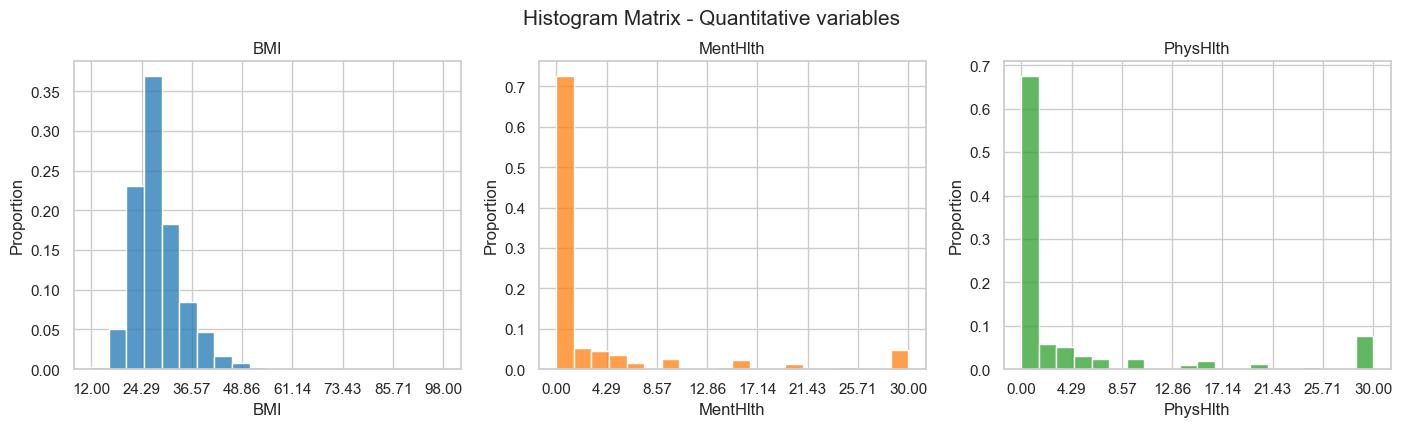

In [23]:
histogram_matrix(df=diabetes_df, bins=20, n_cols=3, title='Histogram Matrix - Quantitative variables', title_fontsize=15, subtitles_fontsize=12,
                 n_xticks=8, figsize=(17,4), auto_col=False, quant_col_names=quant_columns, title_height=1.01)

Each histogram represents the distribution of respondents' reported values for these health indicators.

- The BMI histogram shows a right-skewed distribution, suggesting that a larger number of respondents have a BMI in the lower range, with fewer individuals having higher BMI values.

- The Mental Health histogram is highly skewed to the left, indicating most respondents report lower scores (presumably representing fewer mental health issues), with a small proportion reporting higher scores.

- The Physical Health histogram exhibits a similar left skewness to the Mental Health histogram, with the majority of responses clustering at the lower end of the scale (indicating better physical health) and fewer responses indicating worse physical health.

Overall, these histograms suggest that the majority of the survey's respondents report better mental and physical health, with body mass index showing a more varied distribution.

#### **Boxplot matrix**

We compute an boxplot for each quantitative variable.

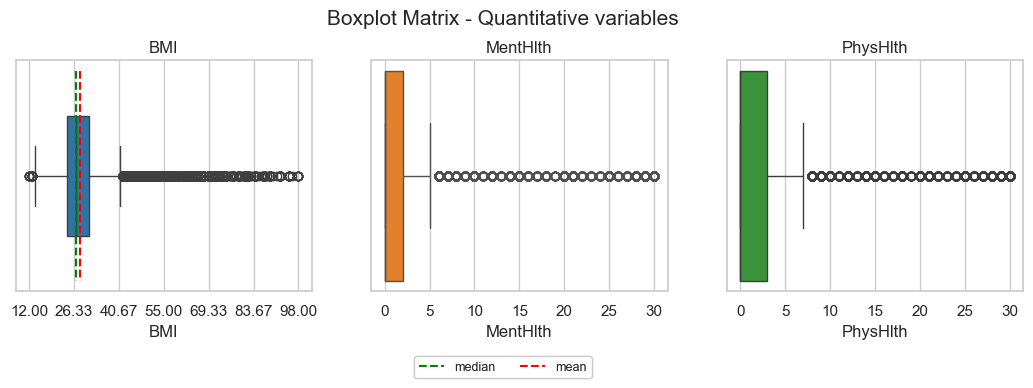

In [24]:
boxplot_matrix(df=diabetes_df, n_cols=3, title='Boxplot Matrix - Quantitative variables', title_fontsize=15, subtitles_fontsize=12,
               n_xticks=7, figsize=(13,3), auto_col=False, quant_col_names=quant_columns, title_height=1.05,
               statistics=['median', 'mean'], color_stats=['green', 'red'],
               lines_width=1.2, legend_size=9, bbox_to_anchor=(0.5, -0.2))

The last two variables haven't lines with the median and mean because have missing values.

In [25]:
diabetes_df_non_quant_NaNs = diabetes_df.drop_nulls(subset=quant_columns)

In [26]:
prop_cols_nulls(diabetes_df_non_quant_NaNs)

Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.023362,0.0,0.0,0.0,0.0,0.0,0.0,0.067201,0.0,0.0,0.001369,0.0,0.0,0.0,0.0,0.011334,0.041928,0.0,0.0


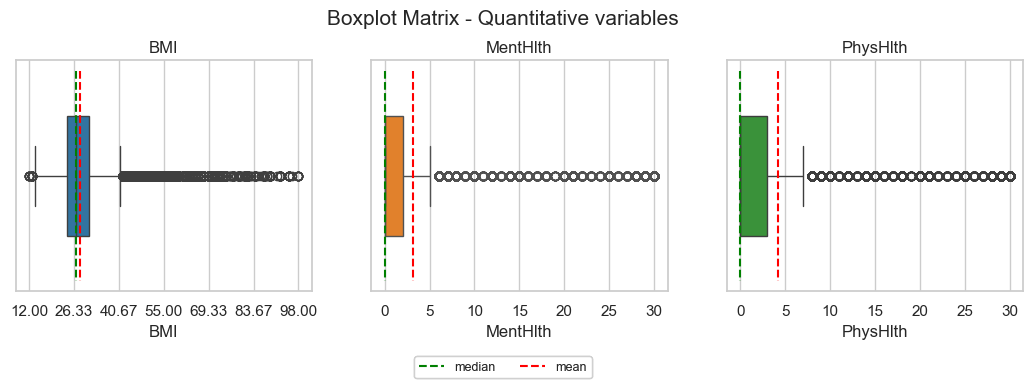

In [27]:
boxplot_matrix(df=diabetes_df_non_quant_NaNs, n_cols=3, title='Boxplot Matrix - Quantitative variables', title_fontsize=15, subtitles_fontsize=12,
               n_xticks=7, figsize=(13,3), auto_col=False, quant_col_names=quant_columns, title_height=1.05,
               statistics=['median', 'mean'], color_stats=['green', 'red'],
               lines_width=1.2, legend_size=9, bbox_to_anchor=(0.5, -0.2))

After the data transformation to remove rows with null values in the quantitative variables, the boxplot matrix shows the following:

*   For BMI, the distribution remains wide with several high-value outliers, indicating a varied body weight distribution. The median is lower than the mean, suggesting a right-skewed distribution.

*   Mental Health and Physical Health both show a concentration of values at the lower end of the scale, with the median and mean closely aligned. This suggests that most people report fewer issues, but there is a tail of respondents reporting higher values.

*   The presence of outliers is still noticeable in all three health indicators, implying that while most values cluster around a central point, there are individuals with significantly different reported outcomes.

The absence of median and mean lines for the last two variables in the previous plot indicates the persisting presence of missing values.

#### **ECDFplot matrix**

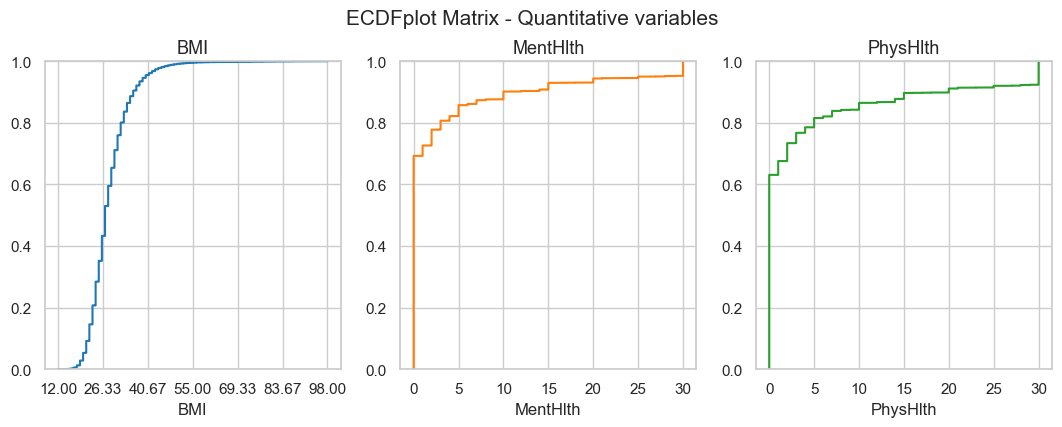

In [28]:
ecdf_matrix(df=diabetes_df, n_cols=3, title='ECDFplot Matrix - Quantitative variables', title_fontsize=15, subtitles_fontsize=13,
            n_xticks=7, figsize=(13,4), auto_col=False, quant_col_names=quant_columns, title_height=1.01)

*   The BMI ECDF suggests a rapid accumulation of values in the lower range, with the curve flattening as it approaches higher BMI values. This indicates that a large proportion of the population has a BMI within a lower range.

*   The Mental Health ECDF shows a more gradual slope, suggesting a more even distribution of responses across the range, but still, the majority have lower scores.

*   The Physical Health ECDF appears to have a similar shape to the Mental Health curve, indicating a similar distribution pattern of responses.

#### **Barplot matrix**

For showing the distribution of the variables, specially the binary ones.

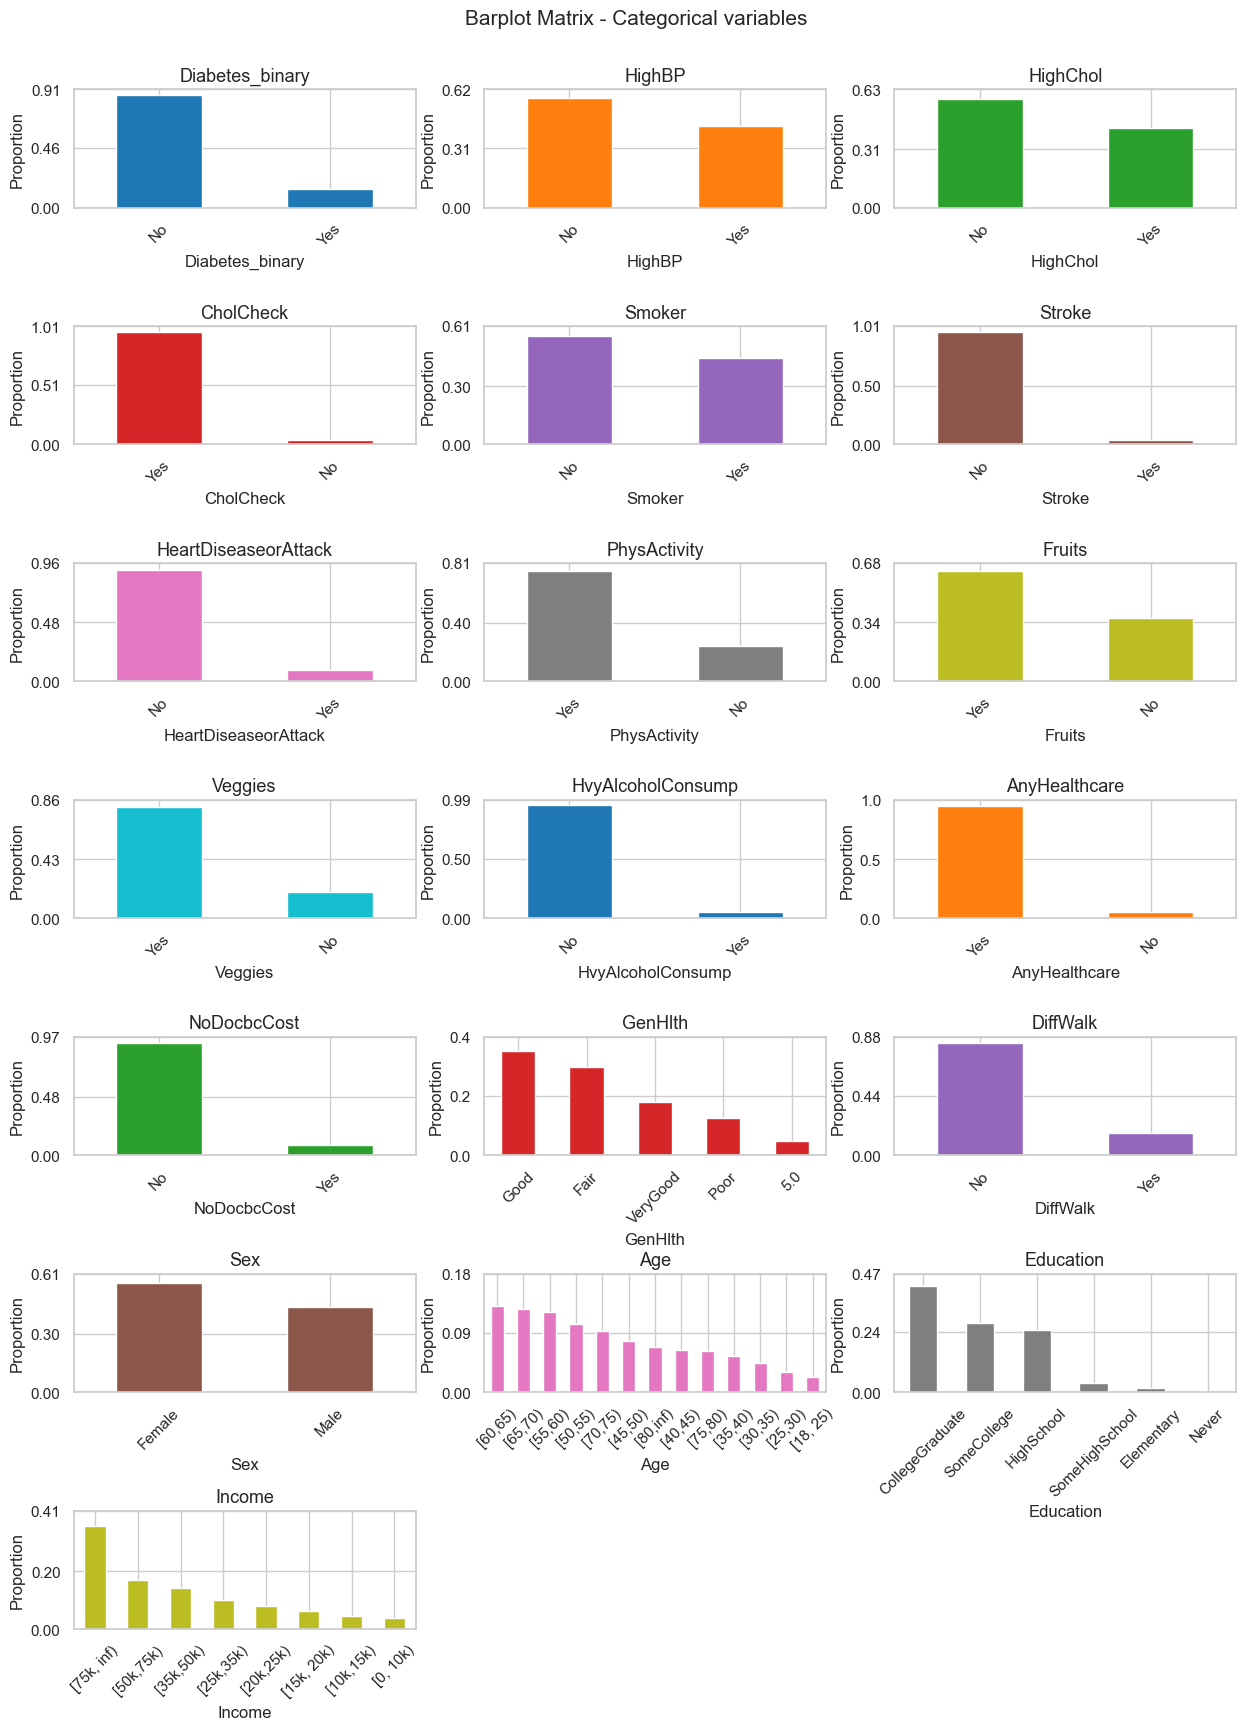

In [29]:
barplot_matrix(diabetes_df, n_cols=3, title='Barplot Matrix - Categorical variables', 
               figsize=(15,20), auto_col=False, cat_col_list=cat_columns, title_height=0.92,
               hspace=1, wspace=0.2, x_rotation=45, title_fontsize=15, subtitles_fontsize=13, n_yticks=3)

*   `"Diabetes_binary"` shows the distribution between individuals with and without diabetes, indicating the proportion affected by the condition.

*   `"HighBP"` reveals how many individuals report having high blood pressure, while `"HighChol"` does the same for high cholesterol, both critical factors in diabetes risk.

*   `"CholCheck"` indicates high compliance with cholesterol monitoring among the survey participants, suggesting awareness or prevalence of cholesterol issues.

*   `"Smoker"` shows a considerable number of individuals identify as smokers, a risk factor for many health issues including diabetes.

*   `"Stroke"` gives an indication of the prevalence of stroke among the respondents.

*   Lifestyle habits are captured in `"PhysActivity"`, `"Fruits"`, and `"Veggies"`, displaying the proportion of individuals who are physically active and those who consume fruits and vegetables regularly.

*   `"HvyAlcoholConsump"` shows how many participants consume alcohol heavily, which can impact health.

*   `"AnyHealthcare"` reflects on the participants' access to healthcare, which is a crucial factor for managing chronic diseases.

*   `"NoDocbcCost"` suggests economic barriers to healthcare, as it shows the proportion of people who have foregone medical care due to cost.

*   `"GenHlth"` represents the participants' self-assessed health status, with categories ranging from excellent to poor.

*   `"DiffWalk"` highlights the number of individuals with difficulties in walking, which may relate to physical health status or disabilities.

*   The `"Sex"` distribution graph indicates the relative proportions of female and male participants.

*   `"Age"` shows a declining number of participants with increasing age, while `"Education"` indicates the distribution of educational attainment levels across the sample.

*   Finally, `"Income"` illustrates the financial distribution among the survey participants, providing insight into the economic diversity of the sample.

Each bar graph provides insight into the frequency and distribution of each category, which is vital for understanding factors associated with diabetes within the population.

### **Response vs Predictors Analysis**

First, we start differentiating between the response and the predictors.

In [31]:
response = 'Diabetes_binary'
predictors = [col for col in diabetes_df.columns if col != response]
quant_predictors = [col for col in predictors if col in quant_columns]
cat_predictors = [col for col in predictors if col in cat_columns]

#### **Response vs Quantitative Predictors**

Now let's compare the distribution of the quantitative predictor variables against the binary response variable for diabetes `Diabetes_binary`.

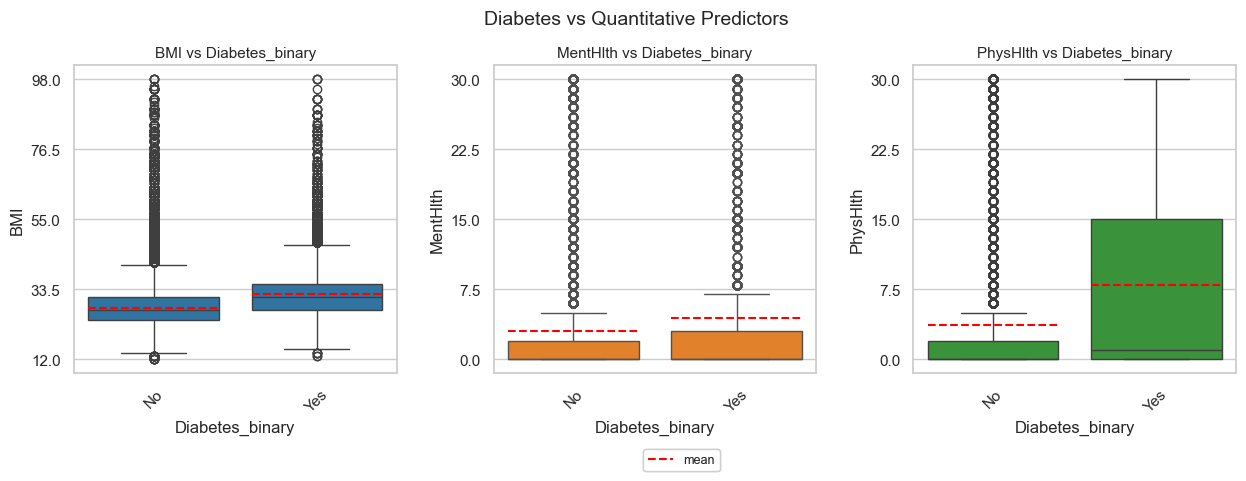

In [33]:
boxplot_2D_matrix(df=diabetes_df, n_cols=3, tittle='Diabetes vs Quantitative Predictors', figsize=(15,4), 
                 cat_col_names=[response], quant_col_names=quant_predictors,
                 n_yticks=5, title_height=1.02, title_fontsize=14, subtitles_fontsize=11,
                 statistics=['mean'], lines_width=0.8, bbox_to_anchor=(0.53, -0.15), 
                 legend_size=9, color_stats=['red'], showfliers=True,
                 hspace=0.5, wspace=0.3, x_rotation=45, auto_col=False)

*   For BMI, individuals with diabetes (`"yes"`) show a higher mean BMI (indicated by the **red** 
dashed line) than those without diabetes (`"no"`), and the distribution has a larger spread, suggesting a correlation between higher BMI and diabetes presence.

*   The Mental Health (`MentHlth`) boxplot indicates a slightly higher mean for those with diabetes compared to those without, but the difference is not as pronounced as with BMI.

*   Physical Health (`PhysHlth`) shows a notably higher mean for diabetic individuals, implying that those with diabetes might have worse physical health than those without.

##### **Cross quant-cat descriptive summary**

This step in the code is generating and displaying a cross-tabulation summary between each quantitative predictor and the response variable.

In [35]:
for col in quant_predictors:
    print('---------------------------------------------------------------------------------')
    print(col)
    display(cross_quant_cat_summary(df=diabetes_df, cat_col=response, quant_col=col))

---------------------------------------------------------------------------------
BMI


Diabetes_binary,prop_BMI,mean_BMI,std_BMI,min_BMI,Q10_BMI,Q25_BMI,median_BMI,Q75_BMI,Q90_BMI,max_price,kurtosis_BMI,skew_BMI,prop_outliers_BMI,prop_nan_BMI
object,object,object,object,object,object,object,object,object,object,object,object,object,f64,f64
No,0.861,27.806,6.291,12.0,21.0,24.0,27.0,31.0,35.0,98.0,13.617,2.331,0.034035,0.0
Yes,0.139,31.944,7.363,13.0,24.0,27.0,31.0,35.0,41.0,98.0,5.716,1.527,0.029679,0.0


---------------------------------------------------------------------------------
MentHlth


Diabetes_binary,prop_MentHlth,mean_MentHlth,std_MentHlth,min_MentHlth,Q10_MentHlth,Q25_MentHlth,median_MentHlth,Q75_MentHlth,Q90_MentHlth,max_price,kurtosis_MentHlth,skew_MentHlth,prop_outliers_MentHlth,prop_nan_MentHlth
object,object,object,object,object,object,object,object,object,object,object,object,object,f64,f64
Yes,0.135,4.467,8.952,0.0,0.0,0.0,0.0,3.0,20.0,30.0,2.864,2.063,0.129906,0.02956
No,0.835,2.979,7.113,0.0,0.0,0.0,0.0,2.0,10.0,30.0,7.364,2.862,0.176342,0.030385


---------------------------------------------------------------------------------
PhysHlth


Diabetes_binary,prop_PhysHlth,mean_PhysHlth,std_PhysHlth,min_PhysHlth,Q10_PhysHlth,Q25_PhysHlth,median_PhysHlth,Q75_PhysHlth,Q90_PhysHlth,max_price,kurtosis_PhysHlth,skew_PhysHlth,prop_outliers_PhysHlth,prop_nan_PhysHlth
object,object,object,object,object,object,object,object,object,object,object,object,object,f64,f64
No,0.838,3.644,8.069,0.0,0.0,0.0,0.0,2.0,15.0,30.0,4.993,2.495,0.0,0.026764
Yes,0.136,7.95,11.297,0.0,0.0,0.0,1.0,15.0,30.0,30.0,-0.338,1.151,0.155212,0.026533


#### **Response vs Categorical Predictors**

##### **Conditional contingence table**

In [33]:
for col in cat_predictors:
    try:
        display(contingency_table_2D(diabetes_df, cat1_name=response, cat2_name=col, 
                                     conditional=True, axis=0))
    except: 
        print('-------------------------------')
        print(f'Computation failed for {col}')
        print('-------------------------------')

(HighBP | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",82225,0.3766
"[""No"", ""No""]",136109,0.6234
"[""Yes"", ""Yes""]",26604,0.7527
"[""No"", ""Yes""]",8742,0.2473


(HighChol | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",83905,0.3843
"[""No"", ""No""]",134429,0.6157
"[""Yes"", ""Yes""]",23686,0.6701
"[""No"", ""Yes""]",11660,0.3299


(CholCheck | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",204181,0.9352
"[""No"", ""No""]",9009,0.0413
"[null, ""No""]",5144,0.0236
"[""Yes"", ""Yes""]",34326,0.9711
"[null, ""Yes""]",785,0.0222
"[""No"", ""Yes""]",235,0.0066


(Smoker | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",94106,0.431
"[""No"", ""No""]",124228,0.569
"[""Yes"", ""Yes""]",18317,0.5182
"[""No"", ""Yes""]",17029,0.4818


(Stroke | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""No"", ""No""]",211310,0.9678
"[""Yes"", ""No""]",7024,0.0322
"[""No"", ""Yes""]",32078,0.9075
"[""Yes"", ""Yes""]",3268,0.0925


(HeartDiseaseorAttack | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""No"", ""No""]",202319,0.9266
"[""Yes"", ""No""]",16015,0.0734
"[""Yes"", ""Yes""]",7878,0.2229
"[""No"", ""Yes""]",27468,0.7771


(PhysActivity | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""No"", ""No""]",48701,0.2231
"[""Yes"", ""No""]",169633,0.7769
"[""No"", ""Yes""]",13059,0.3695
"[""Yes"", ""Yes""]",22287,0.6305


(Fruits | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""No"", ""No""]",78129,0.3578
"[""Yes"", ""No""]",140205,0.6422
"[""Yes"", ""Yes""]",20693,0.5854
"[""No"", ""Yes""]",14653,0.4146


(Veggies | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",166980,0.7648
"[""No"", ""No""]",36635,0.1678
"[null, ""No""]",14719,0.0674
"[""Yes"", ""Yes""]",24923,0.7051
"[""No"", ""Yes""]",8041,0.2275
"[null, ""Yes""]",2382,0.0674


(HvyAlcoholConsump | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""No"", ""No""]",204910,0.9385
"[""Yes"", ""No""]",13424,0.0615
"[""No"", ""Yes""]",34514,0.9765
"[""Yes"", ""Yes""]",832,0.0235


(AnyHealthcare | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",207339,0.9496
"[""No"", ""No""]",10995,0.0504
"[""Yes"", ""Yes""]",33924,0.9598
"[""No"", ""Yes""]",1422,0.0402


(NoDocbcCost | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""No"", ""No""]",200454,0.9181
"[""Yes"", ""No""]",17584,0.0805
"[null, ""No""]",296,0.0014
"[""No"", ""Yes""]",31567,0.8931
"[""Yes"", ""Yes""]",3736,0.1057
"[null, ""Yes""]",43,0.0012


(GenHlth | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""5.0"", ""No""]",7503,0.0344
"[""Fair"", ""No""]",62189,0.2848
"[""Good"", ""No""]",82703,0.3788
"[""Poor"", ""No""]",21780,0.0998
"[""VeryGood"", ""No""]",44159,0.2023
"[""5.0"", ""Yes""]",4578,0.1295
"[""Fair"", ""Yes""]",13457,0.3807
"[""Poor"", ""Yes""]",9790,0.277
"[""Good"", ""Yes""]",6381,0.1805


(DiffWalk | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Yes"", ""No""]",29554,0.1354
"[""No"", ""No""]",188780,0.8646
"[""Yes"", ""Yes""]",13121,0.3712
"[""No"", ""Yes""]",22225,0.6288


(Sex | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""Female"", ""No""]",122166,0.5595
"[null, ""No""]",2489,0.0114
"[""Male"", ""No""]",93679,0.4291
"[""Female"", ""Yes""]",18214,0.5153
"[""Male"", ""Yes""]",16745,0.4737
"[null, ""Yes""]",387,0.0109


(Age | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""[60,65)"", ""No""]",26340,0.1206
"[""[50,55)"", ""No""]",22253,0.1019
"[""[70,75)"", ""No""]",17624,0.0807
"[""[65,70)"", ""No""]",24537,0.1124
"[""[55,60)"", ""No""]",25478,0.1167
"[""[35,40)"", ""No""]",12655,0.058
"[""[45,50)"", ""No""]",17323,0.0793
"[null, ""No""]",9159,0.0419
"[""[75,80)"", ""No""]",12064,0.0553


(Education | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""HighSchool"", ""No""]",51684,0.2367
"[""CollegeGraduate"", ""No""]",96925,0.4439
"[""SomeHighSchool"", ""No""]",7182,0.0329
"[""SomeCollege"", ""No""]",59556,0.2728
"[""Elementary"", ""No""]",2860,0.0131
"[""Never"", ""No""]",127,0.0006
"[""SomeCollege"", ""Yes""]",10354,0.2929
"[""CollegeGraduate"", ""Yes""]",10400,0.2942
"[""HighSchool"", ""Yes""]",11066,0.3131


(Income | Diabetes_binary) : unique values,abs_freq,rel_freq
list[str],i64,f64
"[""[15k, 20k)"", ""No""]",12426,0.0569
"[""[0, 10k)"", ""No""]",7428,0.034
"[""[75k, inf)"", ""No""]",83190,0.381
"[""[35k,50k)"", ""No""]",31179,0.1428
"[""[20k,25k)"", ""No""]",16081,0.0737
"[""[50k,75k)"", ""No""]",37954,0.1738
"[""[10k,15k)"", ""No""]",8697,0.0398
"[""[25k,35k)"", ""No""]",21379,0.0979
"[""[0, 10k)"", ""Yes""]",2383,0.0674


In [34]:
for col in cat_predictors:
    try:
        display(contingency_table_2D(diabetes_df_non_cat_NaNs, cat1_name=response, cat2_name=col, 
                                     conditional=True, axis=1))
    except: 
        print('-------------------------------')
        print(f'Computation failed for {col}')
        print('-------------------------------')

(Diabetes_binary | HighBP) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",117270,0.9395
"[""Yes"", ""No""]",7548,0.0605
"[""No"", ""Yes""]",70731,0.7547
"[""Yes"", ""Yes""]",22985,0.2453


(Diabetes_binary | HighChol) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",115719,0.9199
"[""Yes"", ""No""]",10077,0.0801
"[""No"", ""Yes""]",72282,0.7794
"[""Yes"", ""Yes""]",20456,0.2206


(Diabetes_binary | CholCheck) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",7940,0.9742
"[""Yes"", ""No""]",210,0.0258
"[""No"", ""Yes""]",180061,0.8559
"[""Yes"", ""Yes""]",30323,0.1441


(Diabetes_binary | Smoker) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",107039,0.879
"[""Yes"", ""No""]",14735,0.121
"[""No"", ""Yes""]",80962,0.8367
"[""Yes"", ""Yes""]",15798,0.1633


(Diabetes_binary | Stroke) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",181918,0.8678
"[""Yes"", ""No""]",27714,0.1322
"[""No"", ""Yes""]",6083,0.6833
"[""Yes"", ""Yes""]",2819,0.3167


(Diabetes_binary | HeartDiseaseorAttack) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",174260,0.8802
"[""Yes"", ""No""]",23711,0.1198
"[""Yes"", ""Yes""]",6822,0.3318
"[""No"", ""Yes""]",13741,0.6682


(Diabetes_binary | PhysActivity) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",42008,0.7881
"[""Yes"", ""No""]",11294,0.2119
"[""No"", ""Yes""]",145993,0.8836
"[""Yes"", ""Yes""]",19239,0.1164


(Diabetes_binary | Fruits) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",67237,0.8419
"[""Yes"", ""No""]",12629,0.1581
"[""No"", ""Yes""]",120764,0.8709
"[""Yes"", ""Yes""]",17904,0.1291


(Diabetes_binary | Veggies) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",33904,0.8205
"[""Yes"", ""No""]",7416,0.1795
"[""No"", ""Yes""]",154097,0.8696
"[""Yes"", ""Yes""]",23117,0.1304


(Diabetes_binary | HvyAlcoholConsump) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",176441,0.8555
"[""Yes"", ""No""]",29813,0.1445
"[""No"", ""Yes""]",11560,0.9414
"[""Yes"", ""Yes""]",720,0.0586


(Diabetes_binary | AnyHealthcare) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",9477,0.8853
"[""Yes"", ""No""]",1228,0.1147
"[""No"", ""Yes""]",178524,0.859
"[""Yes"", ""Yes""]",29305,0.141


(Diabetes_binary | NoDocbcCost) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",172849,0.8636
"[""Yes"", ""No""]",27297,0.1364
"[""No"", ""Yes""]",15152,0.824
"[""Yes"", ""Yes""]",3236,0.176


(Diabetes_binary | GenHlth) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""5.0""]",6447,0.6213
"[""Yes"", ""5.0""]",3930,0.3787
"[""No"", ""Fair""]",53548,0.822
"[""Yes"", ""Fair""]",11596,0.178
"[""No"", ""Good""]",71286,0.9281
"[""Yes"", ""Good""]",5519,0.0719
"[""Yes"", ""Poor""]",8503,0.3128
"[""No"", ""Poor""]",18680,0.6872
"[""Yes"", ""VeryGood""]",985,0.0252


(Diabetes_binary | DiffWalk) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""No""]",162551,0.8943
"[""Yes"", ""No""]",19207,0.1057
"[""No"", ""Yes""]",25450,0.692
"[""Yes"", ""Yes""]",11326,0.308


(Diabetes_binary | Sex) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""Female""]",106426,0.8696
"[""Yes"", ""Female""]",15962,0.1304
"[""No"", ""Male""]",81575,0.8484
"[""Yes"", ""Male""]",14571,0.1516


(Diabetes_binary | Age) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""[18, 25)""]",4851,0.986
"[""Yes"", ""[18, 25)""]",69,0.014
"[""No"", ""[25,30)""]",6377,0.98
"[""Yes"", ""[25,30)""]",130,0.02
"[""No"", ""[30,35)""]",9338,0.9724
"[""Yes"", ""[30,35)""]",265,0.0276
"[""No"", ""[35,40)""]",11380,0.9549
"[""Yes"", ""[35,40)""]",537,0.0451
"[""No"", ""[40,45)""]",13010,0.935


(Diabetes_binary | Education) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""CollegeGraduate""]",83433,0.9025
"[""Yes"", ""CollegeGraduate""]",9009,0.0975
"[""Yes"", ""Elementary""]",1020,0.2952
"[""No"", ""Elementary""]",2435,0.7048
"[""No"", ""HighSchool""]",44446,0.823
"[""Yes"", ""HighSchool""]",9557,0.177
"[""Yes"", ""Never""]",37,0.2534
"[""No"", ""Never""]",109,0.7466
"[""No"", ""SomeCollege""]",51308,0.8518


(Diabetes_binary | Income) : unique values,abs_freq,rel_freq
list[str],i32,f64
"[""No"", ""[0, 10k)""]",6431,0.7573
"[""Yes"", ""[0, 10k)""]",2061,0.2427
"[""No"", ""[10k,15k)""]",7479,0.7368
"[""Yes"", ""[10k,15k)""]",2672,0.2632
"[""No"", ""[15k, 20k)""]",10695,0.7764
"[""Yes"", ""[15k, 20k)""]",3080,0.2236
"[""No"", ""[20k,25k)""]",13792,0.796
"[""Yes"", ""[20k,25k)""]",3534,0.204
"[""No"", ""[25k,35k)""]",18457,0.8256


##### **Visualization of conditional contingence table**

In this section, we will graphically represent the information from the previous tables to facilitate the extraction of insights.

In [35]:
def response_conditioned_barplot(df, predictor, response, n_rows, figsize, title_size, subtitles_size, title_height, 
                            xlabel_size=10, xticks_size=9, hspace=1, wspace=0.5, palette='tab10', ylabel_size=11):
    
    cond_prop_response = {}
    for col in cat_predictors:
        cond_prop_response[col] = {}
        for cat in df[col].unique():

            Y_cond = df.filter(pl.col(col) == cat)[response].to_numpy()
            unique_values, counts = np.unique(Y_cond, return_counts=True)
            prop = np.round(counts / len(Y_cond), 3)
            cond_prop_response[col][cat] = dict(zip(unique_values, prop))

    n_categories = len(cond_prop_response[predictor].keys())
    n_cols = int(np.ceil(n_categories / n_rows))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axs.flatten()
    colors = sns.color_palette(palette, 20)

    for i, cat in enumerate(cond_prop_response[predictor]):

        ax = sns.barplot(x=list(cond_prop_response[predictor][cat].keys()), 
                    y=list(cond_prop_response[predictor][cat].values()), 
                    color=colors[i], alpha=1, width=0.4, ax=axes[i])

        axes[i].set_title(cat, fontsize=subtitles_size)

    for i in range(0, len(axes)):
        axes[i].set_ylabel('')
        axes[i].set_xlabel(response, size=xlabel_size)
        axes[i].tick_params(axis='x', rotation=0, labelsize=xticks_size)
        axes[i].set_yticks(np.arange(0,1.2, 0.2))
    axes[0].set_ylabel('Proportion', size=ylabel_size)

    plt.suptitle(f'{response} | {predictor}', size=title_size, weight='bold', y=title_height)
    plt.subplots_adjust(hspace=hspace, wspace=wspace) 
    for j in range(n_categories, n_rows * n_cols):
        fig.delaxes(axes[j])
    plt.show()

In [36]:
n_unique = {}
for col in cat_predictors :
    n_unique[col] = len(diabetes_df[col].unique())

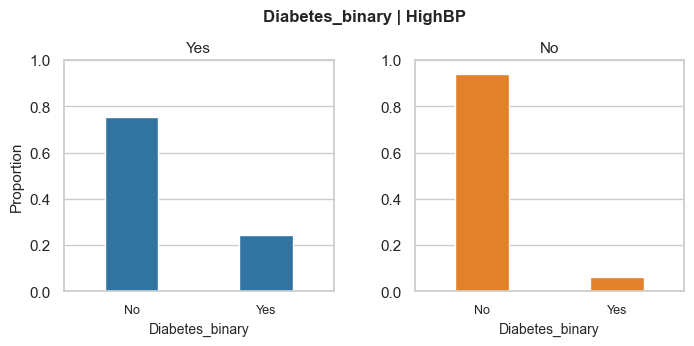

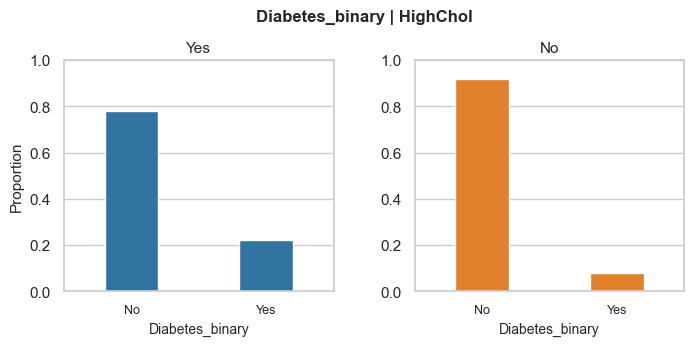

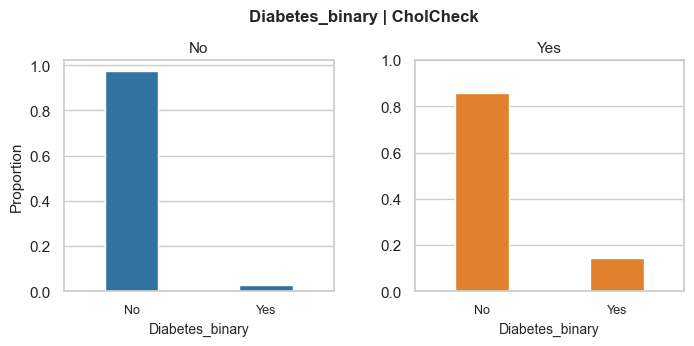

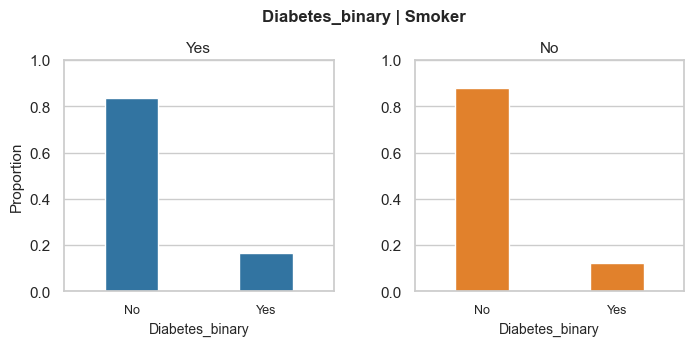

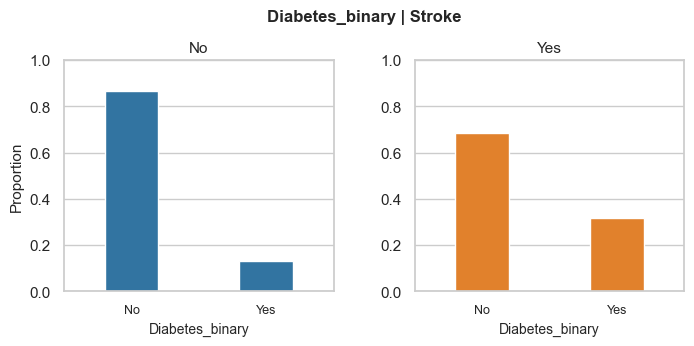

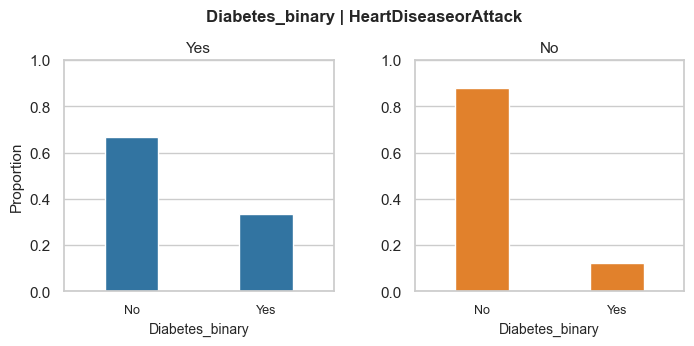

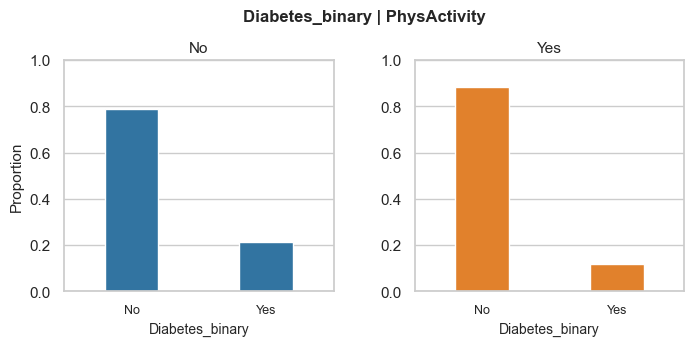

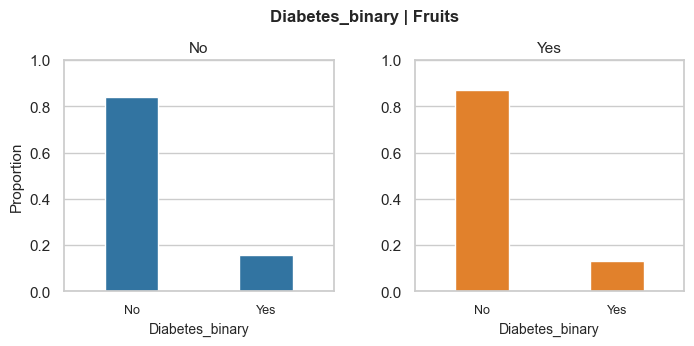

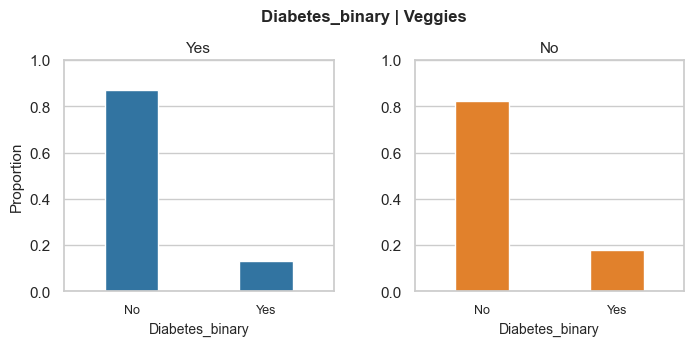

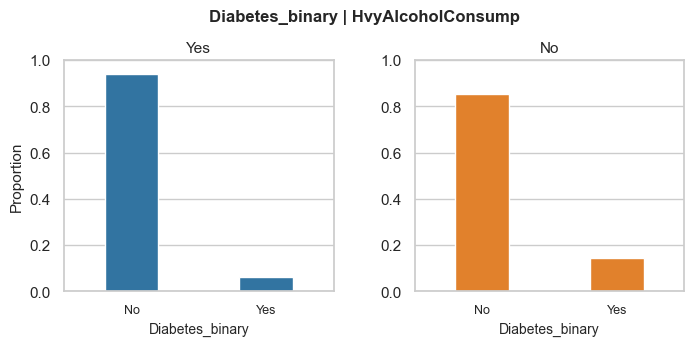

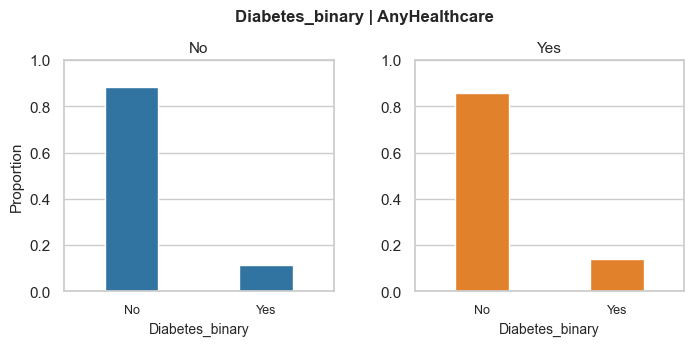

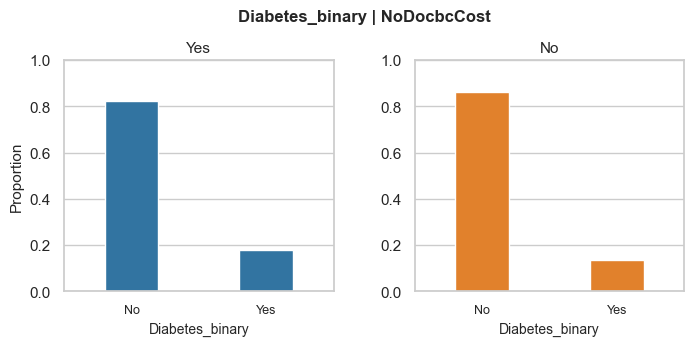

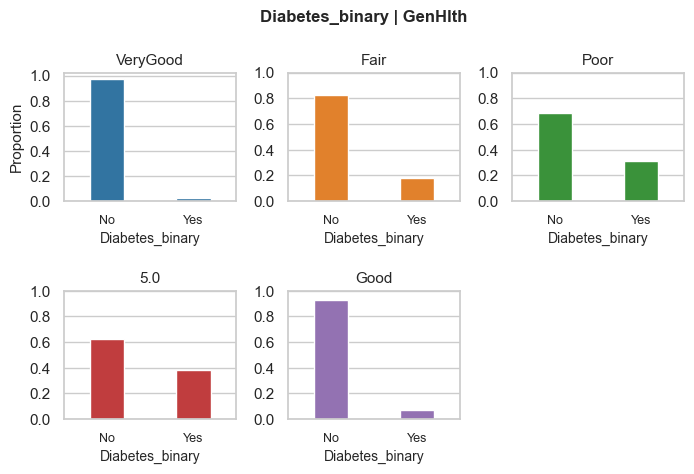

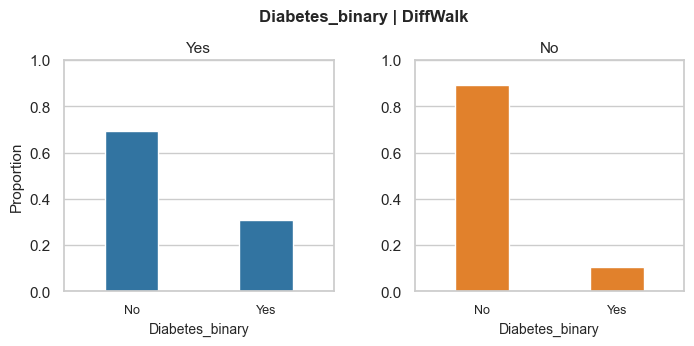

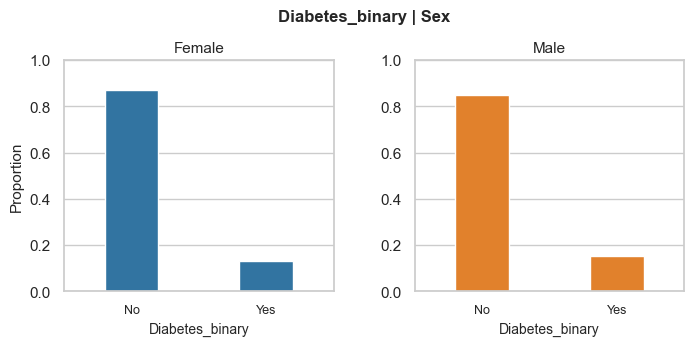

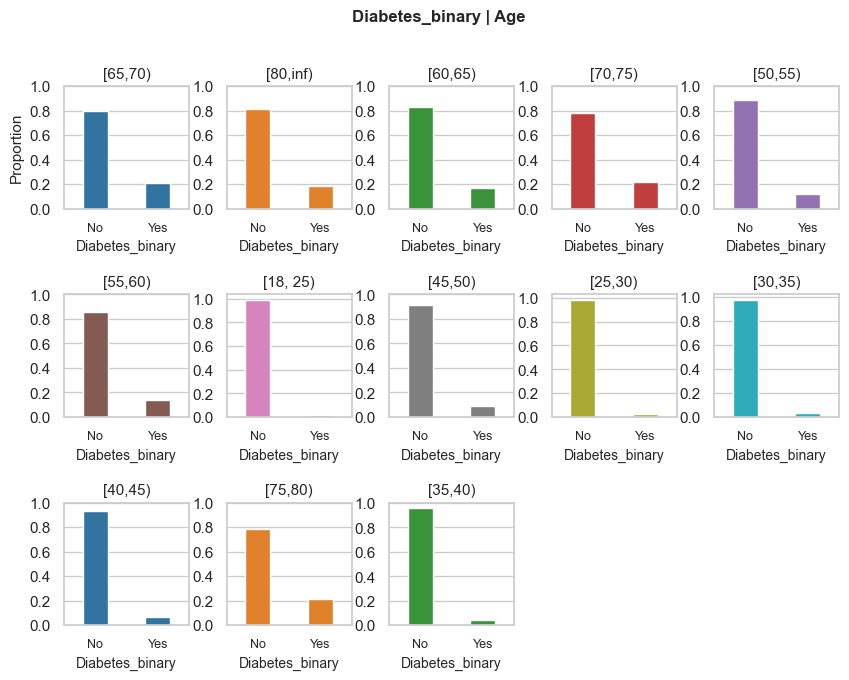

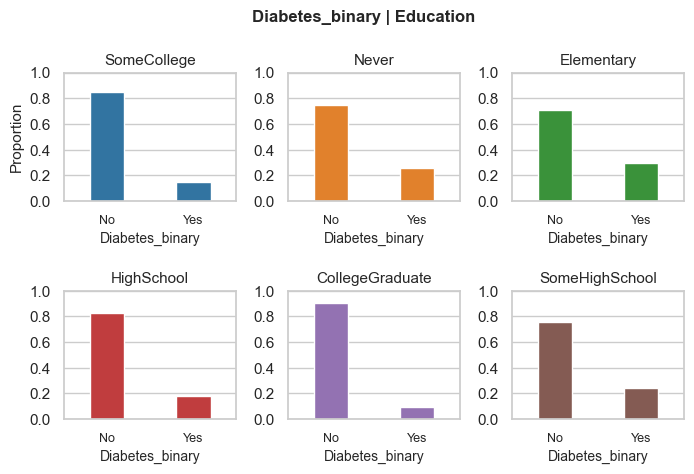

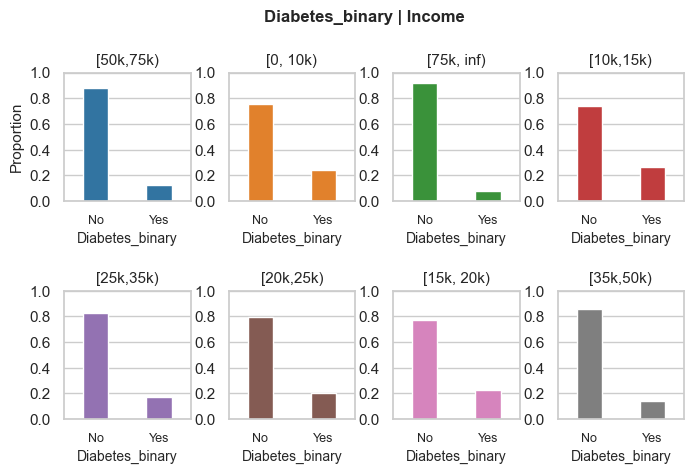

In [37]:
for col in cat_predictors:
    if n_unique[col] <= 3:
        n_rows = 1
        figsize = (8,3)
        title_height = 1.05
    elif n_unique[col] > 4 and n_unique[col] <= 8:
        n_rows = 2
        figsize = (8,4.5)
        title_height = 1.02
    else:
        n_rows = 3
        figsize = (10,7)
        title_height = 0.99


    response_conditioned_barplot(df=diabetes_df_non_cat_NaNs, predictor=col, response=response, n_rows=n_rows, 
                             figsize=figsize, title_size=12, subtitles_size=11, title_height=title_height, 
                             xlabel_size=10, xticks_size=9, hspace=0.7, wspace=0.3, palette='tab10')

These plots help to see the relation of some variables that, in principle, should be related. We are focusing specially in the relation of the response variable with other ones, this analysis could help us in the upcoming parts of the project.

In these last graphs we can see the different relationships that exist between some predictor variables and the response variable. Looking at the distribution of the binary variable in each case we can notice differences. Nor can these relationships be taken literally because some may be due to chance and others to causality. 

In the case of age, if it has been proven in other studies that it is a risk factor, there is a greater proportion of cases of diabetes at certain ages, in this case the most notorious would be the highest. Then there are others that are related to this as the state of health, with age your health worsens and these ailments usually indicate a greater presence of diabetes.

In the case of income, to highlight some, there is perhaps no significant change, but there seems to be a higher proportion in people with lower income, this may be due to a poorer quality of food, higher amount of processed foods and higher consumption of sugar because of its lower cost. This is a relationship that should be reviewed if the change is really significant, possibly a test will help us to find out.

A lot of information can be obtained from these relationships, but as I said before, many times they can be due to coincidences that are not too significant. But it is worth bearing them in mind to study them more closely.

More key insights from the plots include:

*   A higher proportion of individuals with high blood pressure (`"HighBP"`) and high cholesterol (`"HighChol"`) are diabetic compared to non-diabetic.

*   A substantial majority of both diabetic and non-diabetic individuals have had cholesterol checks (`"CholCheck"`), but the proportion is slightly higher for diabetics.

*   Smoking (`"Smoker"`) is more prevalent among diabetics than non-diabetics.

*   Stroke (`"Stroke"`) and heart disease or attack (`"HeartDiseaseorAttack"`) occurrences are notably higher in diabetics.

*   Diabetics are less likely to engage in physical activity (`"PhysActivity"`) than non-diabetics.

*   Diabetics have a lower consumption of fruits (`"Fruits"`) and vegetables (`"Veggies"`), and lower heavy alcohol consumption (`"HvyAlcoholConsump"`).

*   Most individuals, regardless of diabetes status, have some form of healthcare (`"AnyHealthcare"`), but the proportion is marginally higher in diabetics.

*   Diabetics are more likely to report cost as a barrier to seeing a doctor (`"NoDocbcCost"`).

*   General health (`"GenHlth"`) ratings are poorer among diabetics, with higher frequencies of `Fair` and `Poor` ratings.

*   Difficulty walking (`"DiffWalk"`) is more frequently reported by diabetics.

*   Gender (`"Sex"`) shows a balanced distribution across diabetes status, with a slight female preponderance.

*   Age shows an increasing trend of diabetes prevalence with advancing age.

*   Education and income show varied distribution, with a tendency towards lower education and income levels among diabetics.

---

---

## **Intro to Machine Learning with `Sklearn`**

### **Defining the response and predictors**

In [36]:
quant_columns = [col for col in diabetes_df.columns if diabetes_df[col].dtype == pl.Float64]
cat_columns = [col for col in diabetes_df.columns if diabetes_df[col].dtype == pl.Utf8]

response = 'Diabetes_binary'
predictors = [col for col in diabetes_df.columns if col != response]
quant_predictors = [col for col in predictors if col in quant_columns]
cat_predictors = [col for col in predictors if col in cat_columns]

In [37]:
Y = diabetes_df[response].to_pandas()
X = diabetes_df[predictors].to_pandas()

In [38]:
Y

0          No
1          No
2          No
3          No
4          No
         ... 
253675     No
253676    Yes
253677     No
253678     No
253679    Yes
Name: Diabetes_binary, Length: 253680, dtype: object

In [39]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,...,Yes,No,5.0,18.0,15.0,Yes,Female,"[60,65)",HighSchool,"[15k, 20k)"
1,No,No,No,25.0,Yes,No,No,Yes,No,No,...,No,Yes,Fair,0.0,0.0,No,Female,"[50,55)",CollegeGraduate,"[0, 10k)"
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,...,Yes,Yes,5.0,30.0,30.0,Yes,Female,"[60,65)",HighSchool,"[75k, inf)"
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,...,Yes,No,Good,0.0,0.0,No,Female,"[70,75)",SomeHighSchool,"[35k,50k)"
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,...,Yes,No,Good,3.0,0.0,No,Female,"[70,75)",SomeCollege,"[20k,25k)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,Yes,Yes,Yes,45.0,No,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,5.0,No,Male,"[40,45)",CollegeGraduate,"[50k,75k)"
253676,Yes,Yes,Yes,18.0,No,No,No,No,No,No,...,Yes,No,Poor,0.0,0.0,Yes,Female,"[70,75)",Elementary,"[20k,25k)"
253677,No,No,Yes,28.0,No,No,No,Yes,Yes,None,...,Yes,No,VeryGood,0.0,0.0,No,Female,"[25,30)",SomeCollege,"[10k,15k)"
253678,Yes,No,Yes,23.0,No,No,No,No,Yes,Yes,...,Yes,No,Fair,0.0,0.0,No,Male,"[50,55)",SomeCollege,"[0, 10k)"


Things to consider to be able to use the predictors and response properly with `sklearn` estimators:

- They have to be made of numerical type objects (int or float).

- They don't have to contain missing values (NaN)

Otherwise an error will arise.

In [40]:
# Encoding the categorical variables using an ordinal encoder
enc = OrdinalEncoder()
Y = enc.fit_transform(Y.to_numpy().reshape(-1, 1)).flatten()
X_cat = enc.fit_transform(X[cat_predictors])

In [41]:
X_quant = X[quant_predictors].to_numpy()
X = np.column_stack((X_quant, X_cat))

In [43]:
X

array([[40., 18., 15., ...,  8.,  2.,  2.],
       [25.,  0.,  0., ...,  6.,  0.,  0.],
       [28., 30., 30., ...,  8.,  2.,  7.],
       ...,
       [28.,  0.,  0., ...,  1.,  4.,  1.],
       [23.,  0.,  0., ...,  6.,  4.,  0.],
       [25.,  0., nan, ...,  8.,  0.,  1.]])

In [44]:
# Filling the missing values using a simple imputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = simple_imputer.fit_transform(X)

In [45]:
np.sum(np.isnan(X))

0

This is a naive approach since we are imputing the categorical variables also with the mean.

The most correct approach is to apply this separately for que quant and cat variables, applying one strategy for the first an another for the second. We will see this approach later.


### **Defining outer evaluation: train-test split**


In [46]:
# Defining the outer-evaluation: train-test split.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=123, stratify=Y)

In [47]:
X_train.shape

(190260, 21)

In [48]:
X_test.shape

(63420, 21)

### **Defining inner evaluation: K-Fold Cross Validation**

In [49]:
# Defining the inner-evaluation: k-fold cross 
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
# inner = Fold(n_splits=3, shuffle=True, random_state=123)

### **Defining some models**

In [50]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3, random_state=123)
RF = RandomForestClassifier(n_estimators=40, max_features=0.8, max_depth=10, min_samples_split=2, min_samples_leaf=3, random_state=123)

In [51]:
models = [knn, tree, RF]
model_names = ['knn', 'tree', 'RF']

- **Training a model (fit method)**


In [52]:
RF.fit(X=X_train, y=Y_train)

RandomForestClassifier(max_depth=10, max_features=0.8, min_samples_leaf=3,
                       n_estimators=40, random_state=123)

- **Predicting using a model (predict method)**

In [53]:
# Training predictions
Y_train_hat = RF.predict(X=X_train)

In [54]:
# Testing predictions
Y_test_hat = RF.predict(X=X_test)

- **Computing a score**

In [55]:
# Training score
balanced_accuracy_score(y_pred=Y_train_hat, y_true=Y_train)

0.5716832507119044

In [56]:
# Testing score
balanced_accuracy_score(y_pred=Y_test_hat, y_true=Y_test)

0.5574103382707574

### **Applying inner evaluation**

#### **Without HPO**

In [57]:
scores_arr = cross_val_score(X=X_train, y=Y_train, estimator=RF, scoring='balanced_accuracy', cv=inner)
scores_arr

array([0.55845631, 0.5590863 , 0.55492997])

In [58]:
np.mean(scores_arr)

0.5574908591434647

In [59]:
scores = {}
for model, name in zip(models, model_names):
    print(model)
    scores_arr = cross_val_score(X=X_train, y=Y_train, estimator=model, scoring='balanced_accuracy', cv=inner)
    print(scores_arr)
    scores[name] = np.mean(scores_arr)

KNeighborsClassifier(metric='euclidean')
[0.56353619 0.5624154  0.55945893]
DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, random_state=123)
[0.56811021 0.5637455  0.55970761]
RandomForestClassifier(max_depth=10, max_features=0.8, min_samples_leaf=3,
                       n_estimators=40, random_state=123)
[0.55845631 0.5590863  0.55492997]


In [60]:
scores

{'knn': 0.5618035076772085,
 'tree': 0.5638544376891831,
 'RF': 0.5574908591434647}

#### **With HPO**

##### **Grid Search**

In [61]:
param_grid = {'n_estimators': [25, 40],
              'max_features': [0.5, 0.8],
              'max_depth': [2, 5], 
              'min_samples_split': [2],
              'min_samples_leaf': [3]}

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=inner, scoring='balanced_accuracy', verbose=True)   

In [62]:
grid_search.fit(X=X_train, y=Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=123, shuffle=True),
             estimator=RandomForestClassifier(max_depth=10, max_features=0.8,
                                              min_samples_leaf=3,
                                              n_estimators=40,
                                              random_state=123),
             param_grid={'max_depth': [2, 5], 'max_features': [0.5, 0.8],
                         'min_samples_leaf': [3], 'min_samples_split': [2],
                         'n_estimators': [25, 40]},
             scoring='balanced_accuracy', verbose=True)

In [63]:
grid_search.cv_results_['params']

[{'max_depth': 2,
  'max_features': 0.5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 25},
 {'max_depth': 2,
  'max_features': 0.5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 40},
 {'max_depth': 2,
  'max_features': 0.8,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 25},
 {'max_depth': 2,
  'max_features': 0.8,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 40},
 {'max_depth': 5,
  'max_features': 0.5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 25},
 {'max_depth': 5,
  'max_features': 0.5,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 40},
 {'max_depth': 5,
  'max_features': 0.8,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 25},
 {'max_depth': 5,
  'max_features': 0.8,
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 40}]

In [64]:
grid_search.cv_results_['mean_test_score']

array([0.5       , 0.5       , 0.5       , 0.5       , 0.52701078,
       0.52812129, 0.53724633, 0.54013562])

In [65]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 0.8,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 40}

In [66]:
grid_search.best_score_

0.5401356236358016

In [67]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=0.8, min_samples_leaf=3,
                       n_estimators=40, random_state=123)

##### **Random Search**

In [68]:
param_grid = {'n_estimators': [25, 40, 75],
              'max_features': [0.5, 0.8, 1],
              'max_depth': [2, 5, 15, 30], 
              'min_samples_split': [2, 7, 12],
              'min_samples_leaf': [3, 10]}

random_search = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, cv=inner, 
                            scoring='balanced_accuracy', n_iter=5, verbose=True,
                            random_state=123 
                            )   

In [69]:
random_search.fit(X=X_train, y=Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=123, shuffle=True),
                   estimator=RandomForestClassifier(max_depth=10,
                                                    max_features=0.8,
                                                    min_samples_leaf=3,
                                                    n_estimators=40,
                                                    random_state=123),
                   n_iter=5,
                   param_distributions={'max_depth': [2, 5, 15, 30],
                                        'max_features': [0.5, 0.8, 1],
                                        'min_samples_leaf': [3, 10],
                                        'min_samples_split': [2, 7, 12],
                                        'n_estimators': [25, 40, 75]},
                   random_state=123, scoring='balanced_accuracy', verbose=True)

In [70]:
random_search.cv_results_['params']

[{'n_estimators': 25,
  'min_samples_split': 2,
  'min_samples_leaf': 10,
  'max_features': 0.5,
  'max_depth': 30},
 {'n_estimators': 25,
  'min_samples_split': 7,
  'min_samples_leaf': 3,
  'max_features': 1,
  'max_depth': 30},
 {'n_estimators': 40,
  'min_samples_split': 7,
  'min_samples_leaf': 10,
  'max_features': 0.8,
  'max_depth': 2},
 {'n_estimators': 75,
  'min_samples_split': 2,
  'min_samples_leaf': 3,
  'max_features': 0.8,
  'max_depth': 15},
 {'n_estimators': 25,
  'min_samples_split': 7,
  'min_samples_leaf': 3,
  'max_features': 1,
  'max_depth': 5}]

In [71]:
random_search.cv_results_['mean_test_score']

array([0.56483805, 0.52558002, 0.5       , 0.56783233, 0.5       ])

In [72]:
random_search.best_params_

{'n_estimators': 75,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 0.8,
 'max_depth': 15}

In [73]:
random_search.best_score_

0.5678323261825794

In [74]:
random_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=0.8, min_samples_leaf=3,
                       n_estimators=75, random_state=123)

##### **Optuna**

In [75]:
def param_grid(trial):

    param_grid = {
        'n_estimators': trial.suggest_categorical('n_estimators', [25, 40, 75]),
        'max_features': trial.suggest_float('max_features', 0.5, 1, step=0.1),
        'max_depth': trial.suggest_categorical('max_depth', [2, 5, 7, 10, 30]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 25),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 25)
    }

    return param_grid

In [76]:
optuna_search = OptunaSearchCV(estimator=RF, param_grid=param_grid, cv=inner, 
                               scoring='balanced_accuracy', direction='maximize', n_iter=10, 
                               random_state=123)   

In [77]:
optuna_search.fit(X=X_train, y=Y_train)

[I 2024-03-13 00:57:27,335] A new study created in memory with name: no-name-23d81652-00cd-4663-b6f8-79d51d823679
[I 2024-03-13 00:57:37,193] Trial 0 finished with value: 0.5440858669032845 and parameters: {'n_estimators': 25, 'max_features': 0.8, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.5440858669032845.
[I 2024-03-13 00:57:41,065] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 25, 'max_features': 0.7, 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 22}. Best is trial 0 with value: 0.5440858669032845.
[I 2024-03-13 00:57:51,562] Trial 2 finished with value: 0.5540121521305189 and parameters: {'n_estimators': 25, 'max_features': 0.6, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.5540121521305189.
[I 2024-03-13 00:57:58,297] Trial 3 finished with value: 0.5363257606753301 and parameters: {'n_estimators': 25, 'max_features': 0.7, 'max_depth': 5, 'min_s

In [78]:
optuna_search.results()

,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,score
5,75.0,1.0,30.0,22.0,3.0,0.571658
4,25.0,1.0,10.0,15.0,10.0,0.558439
7,75.0,0.6,10.0,10.0,3.0,0.554656
2,25.0,0.6,10.0,12.0,12.0,0.554012
9,75.0,0.5,10.0,22.0,11.0,0.552342
8,75.0,1.0,5.0,11.0,7.0,0.546045
0,25.0,0.8,7.0,11.0,10.0,0.544086
6,25.0,0.8,5.0,16.0,15.0,0.537246
3,25.0,0.7,5.0,9.0,11.0,0.536326
1,25.0,0.7,2.0,17.0,22.0,0.500000


In [79]:
optuna_search.best_params_

{'n_estimators': 75,
 'max_features': 1.0,
 'max_depth': 30,
 'min_samples_split': 22,
 'min_samples_leaf': 3}

In [80]:
optuna_search.best_score_

0.5716577312956537

##### **Applying HPO to all the models together**

In [81]:
best_scores, best_params = {}, {}

In [82]:
def param_grid_RF(trial):

    param_grid = {
        'n_estimators': trial.suggest_categorical('n_estimators', [25, 40, 75]),
        'max_features': trial.suggest_float('max_features', 0.5, 1, step=0.1),
        'max_depth': trial.suggest_categorical('max_depth', [2, 5, 7, 10, 30]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 25),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 25)
    }

    return param_grid

In [83]:
def param_grid_trees(trial):

    param_grid = {
        'max_depth': trial.suggest_categorical('max_depth', [2, 5, 7, 10, 30]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 25),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 25)
    }

    return param_grid

In [84]:
def param_grid_knn(trial):

    param_grid = {
        'n_neighbors': trial.suggest_int('n_neighbors', 2, 4),
        'metric': trial.suggest_categorical('metric', ['minkowski', 'euclidean']),
    }

    if param_grid['metric'] == 'minkowski':

        param_grid.update({'p': trial.suggest_categorical('p', [1, 2])})

    return param_grid

In [85]:
model = knn
name = 'knn'
param_grid = param_grid_knn

optuna_search = OptunaSearchCV(estimator=model, param_grid=param_grid, cv=inner, 
                               scoring='balanced_accuracy', direction='maximize', 
                               n_iter=5, random_state=111)   

optuna_search.fit(X=X_train, y=Y_train)

best_scores[name] = optuna_search.best_score_
best_params[name] = optuna_search.best_params_
# Time: 2 mins

[I 2024-03-13 01:00:43,931] A new study created in memory with name: no-name-f8f25b59-79fe-4bf8-953e-22e870030d1d
[I 2024-03-13 01:01:15,787] Trial 0 finished with value: 0.5716124226792975 and parameters: {'n_neighbors': 3, 'metric': 'euclidean'}. Best is trial 0 with value: 0.5716124226792975.
[I 2024-03-13 01:01:46,091] Trial 1 finished with value: 0.5361065939877293 and parameters: {'n_neighbors': 4, 'metric': 'minkowski', 'p': 2}. Best is trial 0 with value: 0.5716124226792975.
[I 2024-03-13 01:02:17,608] Trial 2 finished with value: 0.5342243145920306 and parameters: {'n_neighbors': 2, 'metric': 'euclidean'}. Best is trial 0 with value: 0.5716124226792975.
[I 2024-03-13 01:02:49,092] Trial 3 finished with value: 0.5342243145920306 and parameters: {'n_neighbors': 2, 'metric': 'euclidean'}. Best is trial 0 with value: 0.5716124226792975.
[I 2024-03-13 01:03:20,440] Trial 4 finished with value: 0.5716124226792975 and parameters: {'n_neighbors': 3, 'metric': 'euclidean'}. Best is tri

In [94]:
model = tree
name = 'trees'
param_grid = param_grid_trees

optuna_search = OptunaSearchCV(estimator=model, param_grid=param_grid, cv=inner, 
                               scoring='balanced_accuracy', direction='maximize', 
                               n_iter=20, random_state=123)   

optuna_search.fit(X=X_train, y=Y_train)

best_scores[name] = optuna_search.best_score_
best_params[name] = optuna_search.best_params_
# Time: 17 secs

[I 2024-03-13 01:12:02,191] A new study created in memory with name: no-name-26fcad2c-f2d7-408a-b023-8624016b6bf1
[I 2024-03-13 01:12:03,354] Trial 0 finished with value: 0.5793985727406281 and parameters: {'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 25}. Best is trial 0 with value: 0.5793985727406281.
[I 2024-03-13 01:12:04,909] Trial 1 finished with value: 0.5955955998132402 and parameters: {'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.5955955998132402.
[I 2024-03-13 01:12:05,490] Trial 2 finished with value: 0.5462235197836873 and parameters: {'max_depth': 5, 'min_samples_split': 14, 'min_samples_leaf': 17}. Best is trial 1 with value: 0.5955955998132402.
[I 2024-03-13 01:12:05,822] Trial 3 finished with value: 0.5 and parameters: {'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.5955955998132402.
[I 2024-03-13 01:12:06,408] Trial 4 finished with value: 0.54622351978368

In [95]:
model = RF
name = 'RF'
param_grid = param_grid_RF

optuna_search = OptunaSearchCV(estimator=model, param_grid=param_grid, cv=inner, 
                               scoring='balanced_accuracy', direction='maximize',
                               n_iter=7, random_state=123)   

optuna_search.fit(X=X_train, y=Y_train)

best_scores[name] = optuna_search.best_score_
best_params[name] = optuna_search.best_params_
# Time: 1.35 mins

[I 2024-03-13 01:12:26,056] A new study created in memory with name: no-name-209540ce-6138-4f10-8ab5-222053295e21
[I 2024-03-13 01:12:37,588] Trial 0 finished with value: 0.5440858669032845 and parameters: {'n_estimators': 25, 'max_features': 0.8, 'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.5440858669032845.
[I 2024-03-13 01:12:42,189] Trial 1 finished with value: 0.5 and parameters: {'n_estimators': 25, 'max_features': 0.7, 'max_depth': 2, 'min_samples_split': 17, 'min_samples_leaf': 22}. Best is trial 0 with value: 0.5440858669032845.
[I 2024-03-13 01:12:55,492] Trial 2 finished with value: 0.5540121521305189 and parameters: {'n_estimators': 25, 'max_features': 0.6, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.5540121521305189.
[I 2024-03-13 01:13:04,289] Trial 3 finished with value: 0.5363257606753301 and parameters: {'n_estimators': 25, 'max_features': 0.7, 'max_depth': 5, 'min_s

#### **Selecting the best model**

In [96]:
best_scores

{'knn': 0.5716124226792975,
 'trees': 0.5956727778249408,
 'RF': 0.5716577312956537}

In [97]:
best_scores_values = np.array(list(best_scores.values()))

In [98]:
print(f'The best model, according to the inner evaluation is: {model_names[np.argmax(best_scores_values)]} \nwith an inner score of {np.max(best_scores_values)}')

The best model, according to the inner evaluation is: tree 
with an inner score of 0.5956727778249408


### **Applying outer evaluation**

Outer evaluation means to estimate the future performance of a model, in this case we are going to apply that to the best model.

In [99]:
tree

DecisionTreeClassifier(max_depth=30, min_samples_leaf=19, min_samples_split=25,
                       random_state=123)

In [100]:
best_params['trees']

{'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 3}

In [101]:
tree.set_params(**best_params['trees'])

DecisionTreeClassifier(max_depth=30, min_samples_leaf=3, random_state=123)

In [102]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [103]:
tree.fit(X=X_train, y=Y_train)
Y_test_hat = tree.predict(X=X_test)
future_performance = balanced_accuracy_score(y_pred=Y_test_hat, y_true=Y_test)
future_performance

0.5959711429110877

### **ML with Pipelines**

In [104]:
Y = diabetes_df[response].to_pandas()
X = diabetes_df[predictors].to_pandas()

# Since pipelines transformers are a always applied to X (in sklearn) 
# we need to apply the needed transformers to Y individually and as a first step.
enc = OrdinalEncoder()
Y = enc.fit_transform(Y.to_numpy().reshape(-1, 1)).flatten()

# Defining the outer-evaluation: train-test split.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=123, stratify=Y)

# Defining the inner-evaluation: k-fold cross 
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

In [105]:
# To use this X must be a pandas data-frame, in order to select the column by names
quant_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler(with_mean=True, with_std=True))
    ])

cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder()), # encoding the categorical variables is needed for some imputers
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ])

quant_cat_processing = ColumnTransformer(transformers=[('quant', quant_pipeline, quant_predictors),
                                                       ('cat', cat_pipeline, cat_predictors)])

In [106]:
pipelines = {}

In [107]:
pipelines['trees'] = Pipeline([
             ('preprocessing', quant_cat_processing),
             ('trees', DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3, random_state=123)) 
            ])

In [108]:
pipelines['trees']

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('trees',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=3,
                                        random_state=123))])

In [109]:
pipelines['trees'].steps

[('preprocessing',
  ColumnTransformer(transformers=[('quant',
                                   Pipeline(steps=[('imputer', SimpleImputer()),
                                                   ('scaler', StandardScaler())]),
                                   ['BMI', 'MentHlth', 'PhysHlth']),
                                  ('cat',
                                   Pipeline(steps=[('encoder', OrdinalEncoder()),
                                                   ('imputer',
                                                    SimpleImputer(strategy='most_frequent'))]),
                                   ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                                    'Stroke', 'HeartDiseaseorAttack',
                                    'PhysActivity', 'Fruits', 'Veggies',
                                    'HvyAlcoholConsump', 'AnyHealthcare',
                                    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex',
                                    'Age',

In [110]:
pipelines['trees'].fit(X=X_train, y=Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('trees',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=3,
                                        random_state=123))])

In [111]:
Y_test_hat = pipelines['trees'].predict(X=X_test)
Y_test_hat

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
balanced_accuracy_score(y_pred=Y_test_hat, y_true=Y_test)

0.5694157240863605

In [113]:
pipelines['trees'] = Pipeline([
             ('preprocessing', quant_cat_processing),
            ('features_selector', SelectKBest(f_classif, k=5)),
            ('trees', DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3, random_state=123)) 
            ])

In [114]:
pipelines['trees']

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('features_selector', SelectKBest(k=5)),
                ('trees',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=3,
                                        random_state=123))])

In [115]:
pipelines['trees'].fit(X=X_train, y=Y_train)
Y_test_hat = pipelines['trees'].predict(X=X_test)
balanced_accuracy_score(y_pred=Y_test_hat, y_true=Y_test)

0.5478283308531597

In [116]:
selected_features = pipelines['trees'].steps[1][1].get_support(indices=True)
selected_features

array([ 0,  3,  4,  8, 16], dtype=int64)

In [117]:
np.array(diabetes_df[predictors].columns)[selected_features]

array(['HighBP', 'BMI', 'Smoker', 'Fruits', 'DiffWalk'], dtype='<U20')

We can do both inner and outer evaluation using pipelines, and we will see that in the next section.

---

---

## **Advanced Machine Learning Workflow**

### **Defining the response and predictors**

In [6]:
quant_columns = [col for col in diabetes_df.columns if diabetes_df[col].dtype == pl.Float64]
cat_columns = [col for col in diabetes_df.columns if diabetes_df[col].dtype == pl.Utf8]

response = 'Diabetes_binary'
predictors = [col for col in diabetes_df.columns if col != response]
quant_predictors = [col for col in predictors if col in quant_columns]
cat_predictors = [col for col in predictors if col in cat_columns]

In order to make the below part simpler (specially in terms of time) we are going to use a quarter of the total dataset. It will be chosen randomly.

In [7]:
# In order to make the below part simpler (specially in terms of time)
frac_sample = 0.25
print(frac_sample*len(diabetes_df))
diabetes_df_sample = diabetes_df.sample(fraction=frac_sample, seed=123)

63420.0


In [8]:
Y = diabetes_df_sample[response].to_pandas()
X = diabetes_df_sample[predictors].to_pandas()
# The Null values of the Polars columns that are define as Object type by Pandas are treated as None and not as NaN (that is what we want)
# The avoid this behavior the next step is necessary
X = X.fillna(value=np.nan)

In [9]:
# Necessary step to apply sklearn later
enc = OrdinalEncoder()
Y = enc.fit_transform(Y.to_numpy().reshape(-1, 1)).flatten()

### **Defining outer evaluation: train-test split**


In [10]:
# Defining the outer-evaluation: train-test split.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=123, stratify=Y)

In [ ]:
X_train.shape

(47565, 21)

In [ ]:
X_test.shape

(15855, 21)

### **Defining inner evaluation: K-Fold Cross Validation**

In [11]:
# Defining the inner-evaluation: k-fold cross 
# We use StratifiedKFold to ensure the same classes distribution in training and testing partitions
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)
# inner = Fold(n_splits=3, shuffle=True, random_state=123)

### **Defining the Pipelines**

We define the preprocessing pipeline using `ColumnTransformer` that allows to define different preprocessing pipelines for different set of variables, which is very useful since allow us to apply certain preprocessing method to the categorical variables an another to the quantitative ones.

In [12]:
quant_pipeline = Pipeline([
    ('imputer', imputer()),
    ('scaler', scaler())
    ])

cat_pipeline = Pipeline([
    ('encoder', encoder()), # encoding the categorical variables is needed by some imputers
    ('imputer', imputer())
    ])

quant_cat_processing = ColumnTransformer(transformers=[('quant', quant_pipeline, quant_predictors),
                                                       ('cat', cat_pipeline, cat_predictors)])

Here we define the complete pipelines (preprocessing + models = transformers + estimators), using the below preprocessing pipelines defined for the categorical and quantitative variables.

In [13]:
# Defining dictionaries to save important objects:
inner_score, best_params, inner_results, pipelines = {}, {}, {}, {}

model_keys = ['knn', 'trees', 'extra_trees',
              'RF', 'HGB', 'NN', 'SVM', 'GB', 
              'XGB', 'logistic_reg', 'bagging_knn', 
              ]

models = [KNeighborsClassifier(n_jobs=-1), 
          DecisionTreeClassifier(random_state=123), 
          ExtraTreesClassifier(random_state=123),
          RandomForestClassifier(random_state=123), 
          HistGradientBoostingClassifier(random_state=123), 
          MLPClassifier(random_state=123),
          LinearSVC(random_state=123),  
          GradientBoostingClassifier(random_state=123), 
          XGBClassifier(random_state=123),
          LogisticRegression(max_iter=250, solver='saga', random_state=123),
          BaggingClassifier(estimator=KNeighborsClassifier(), random_state=123),
          ]

for key, model in zip(model_keys, models):

    pipelines[key] = {}
    inner_score[key], best_params[key], inner_results[key] = {}, {}, {}

    pipelines[key] = Pipeline([
            ('preprocessing', quant_cat_processing),
            ('features_selector', features_selector(cv=2, k=10, n_jobs=-1)),
            (key, model) 
            ])

The following graph shows how the general pipeline looks like, in this case using logistic regression as estimator.

In [14]:
pipelines['logistic_reg']

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   imputer()),
                                                                  ('scaler',
                                                                   scaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   encoder()),
                                                                  ('imputer',
                                                                   imputer())]),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('features_selector', features_selector(cv=2, k=10, n_jobs=-1)),
                ('logistic_reg',
                 LogisticRegression(max_iter=250, random_state=123,
                                    solver='saga'))])

### **Applying inner evaluation**

#### **Grids for HPO**

In this section we define all the grids to be used along the HPO part. This grids define the values of the different parameters that will be explored in the HPO process.

- Grid for the preprocessing methods (transformers)

In [ ]:
def common_param_grid(trial):

    # Fix Grid
    param_grid = {
        'preprocessing__quant__scaler__apply': trial.suggest_categorical('preprocessing__quant__scaler__apply', [True, False]),
        'preprocessing__cat__encoder__method': trial.suggest_categorical('preprocessing__cat__encoder__method', ['ordinal', 'one-hot']),
        'preprocessing__cat__imputer__apply': trial.suggest_categorical('preprocessing__cat__imputer__apply', [True]),
        'preprocessing__quant__imputer__apply': trial.suggest_categorical('preprocessing__quant__imputer__apply', [True]),
        'features_selector__apply': trial.suggest_categorical('features_selector__apply', [False, True])
    }

    # Conditioned Grid
    if param_grid['features_selector__apply'] == True:

        param_grid.update({'features_selector__method': trial.suggest_categorical('features_selector__method', 
                                                                                  ['Fpr_f_class', 'Fdr_f_class', 
                                                                                   'KBest_mutual_class',
                                                                                   'Percentile_mutual_class',
                                                                                   #'backward_trees_class', # Takes too much time with one-hot (too many predictors)
                                                                                   #'forward_trees_class' # Takes too much time with one-hot (too many predictors)
                                                                                   ])})

        # This is not allowed in Optuna yet (suggest categorical dynamically)
        '''        
        if param_grid['preprocessing__cat__encoder__method'] == 'one-hot':

            param_grid.update({'features_selector__method': trial.suggest_categorical('features_selector__method', 
                                                                                  ['Fpr_f_class', 'Fdr_f_class', 
                                                                                   #'Fpr_mutual_class', 
                                                                                   #'Fpr_mutual_class'
                                                                                   #'backward_trees_class', 
                                                                                   #'forward_trees_class'
                                                                                   ])})
        elif param_grid['preprocessing__cat__encoder__method'] == 'ordinal':

            param_grid.update({'features_selector__method': trial.suggest_categorical('features_selector__method', 
                                                                                  ['Fpr_f_class', 'Fdr_f_class', 
                                                                                   #'Fpr_mutual_class', 
                                                                                   #'Fpr_mutual_class'
                                                                                   #'backward_trees_class', 
                                                                                   'forward_trees_class'
                                                                                   ])})
        '''

    if param_grid['preprocessing__quant__scaler__apply'] == True:
    
        param_grid.update({'preprocessing__quant__scaler__method': trial.suggest_categorical('preprocessing__quant__scaler__method', ['standard', 'min-max'])})

    if param_grid['preprocessing__quant__imputer__apply'] == True:

        param_grid.update({'preprocessing__quant__imputer__method': trial.suggest_categorical('preprocessing__quant__imputer__method', ['simple_median', 'iterative_median', 'knn'])})
        param_grid.update({'preprocessing__cat__imputer__method': trial.suggest_categorical('preprocessing__cat__imputer__method', ['simple_most_frequent', 'iterative_most_frequent', 'knn'])})
        
        if  param_grid['preprocessing__quant__imputer__method'] == 'knn':
            param_grid.update({'preprocessing__quant__imputer__n_neighbors': trial.suggest_int('preprocessing__quant__imputer__n_neighbors', 1, 4)})

        if  param_grid['preprocessing__cat__imputer__method'] == 'knn':
            param_grid.update({'preprocessing__cat__imputer__n_neighbors': trial.suggest_int('preprocessing__cat__imputer__n_neighbors', 1, 4)})

        if 'iterative' in param_grid['preprocessing__quant__imputer__method']:
            param_grid.update({'preprocessing__quant__imputer__n_nearest_features': trial.suggest_int('preprocessing__quant__imputer__n_nearest_features', 3, 7)})

        if 'iterative' in param_grid['preprocessing__cat__imputer__method']:
            param_grid.update({'preprocessing__cat__imputer__n_nearest_features': trial.suggest_int('preprocessing__cat__imputer__n_nearest_features', 3, 7)})

    return param_grid

- Refined grid for the preprocessing methods

In [ ]:
# Based on previous trials we refine the grid
def common_param_grid_refined(trial):

    # Fix Grid
    param_grid = {
        'preprocessing__quant__scaler__apply': trial.suggest_categorical('preprocessing__quant__scaler__apply', [False]),
        'preprocessing__cat__encoder__method': trial.suggest_categorical('preprocessing__cat__encoder__method', ['one-hot']),
        'preprocessing__cat__imputer__apply': trial.suggest_categorical('preprocessing__cat__imputer__apply', [True]),
        'preprocessing__quant__imputer__apply': trial.suggest_categorical('preprocessing__quant__imputer__apply', [True]),
        'features_selector__apply': trial.suggest_categorical('features_selector__apply', [True])
    }

    # Conditioned Grid
    if param_grid['features_selector__apply'] == True:

        param_grid.update({'features_selector__method': trial.suggest_categorical('features_selector__method', 
                                                                                  ['Fdr_f_class'])})

    if param_grid['preprocessing__quant__scaler__apply'] == True:
    
        param_grid.update({'preprocessing__quant__scaler__method': trial.suggest_categorical('preprocessing__quant__scaler__method', ['standard', 'min-max'])})

    if param_grid['preprocessing__quant__imputer__apply'] == True:

        param_grid.update({'preprocessing__quant__imputer__method': trial.suggest_categorical('preprocessing__quant__imputer__method', ['iterative_median'])})
        param_grid.update({'preprocessing__cat__imputer__method': trial.suggest_categorical('preprocessing__cat__imputer__method', ['simple_most_frequent'])})
        
        if  param_grid['preprocessing__quant__imputer__method'] == 'knn':
            param_grid.update({'preprocessing__quant__imputer__n_neighbors': trial.suggest_int('preprocessing__quant__imputer__n_neighbors', 1, 4)})

        if  param_grid['preprocessing__cat__imputer__method'] == 'knn':
            param_grid.update({'preprocessing__cat__imputer__n_neighbors': trial.suggest_int('preprocessing__cat__imputer__n_neighbors', 1, 4)})

        if 'iterative' in param_grid['preprocessing__quant__imputer__method']:
            param_grid.update({'preprocessing__quant__imputer__n_nearest_features': trial.suggest_categorical('preprocessing__quant__imputer__n_nearest_features', [6])})

        if 'iterative' in param_grid['preprocessing__cat__imputer__method']:
            param_grid.update({'preprocessing__cat__imputer__n_nearest_features': trial.suggest_int('preprocessing__cat__imputer__n_nearest_features', 5, 7)})

    return param_grid

- Grid for KNN 

In [ ]:
def param_grid_knn(trial):

    param_grid = common_param_grid(trial)

    # NoT conditioned grid for KNN
    param_grid.update({
        'knn__n_neighbors': trial.suggest_int('knn__n_neighbors', 1, 5),
        'knn__metric': trial.suggest_categorical('knn__metric', ['cosine', 'minkowski', 'cityblock'])
    })

    # Conditioned grid for KNN
    if param_grid['knn__metric'] == 'minkowski':
        param_grid['knn__p'] = trial.suggest_int('knn__p', 1, 4)

    return param_grid

In [ ]:
def param_grid_knn_refined(trial):

    param_grid = common_param_grid_refined(trial)

    # NoT conditioned grid for KNN
    param_grid.update({
        'knn__n_neighbors': trial.suggest_int('knn__n_neighbors', 1, 15),
        'knn__metric': trial.suggest_categorical('knn__metric', ['cosine', 'minkowski', 'cityblock'])
    })

    # Conditioned grid for KNN
    if param_grid['knn__metric'] == 'minkowski':
        param_grid['knn__p'] = trial.suggest_int('knn__p', 1, 4)

    return param_grid

- Grid for Trees

In [ ]:
def param_grid_trees(trial):

    param_grid = common_param_grid(trial)

    param_grid.update({
        'trees__max_depth': trial.suggest_categorical('trees__max_depth', [None, 2, 5, 7, 10, 20, 30]),
        'trees__min_samples_split': trial.suggest_int('trees__min_samples_split', 2, 25),
        'trees__min_samples_leaf': trial.suggest_int('trees__min_samples_leaf', 2, 25),
        'trees__splitter': trial.suggest_categorical('trees__splitter', ['best', 'random']),
        'trees__criterion': trial.suggest_categorical('trees__criterion', ['log_loss', 'gini', 'entropy']),
        #'trees__ccp_alpha': trial.suggest_categorical('trees__ccp_alpha', [0, 0.1, 0.3, 0.5, 0.8])
    })

    return param_grid

In [ ]:
def param_grid_trees_refined(trial):

    param_grid = common_param_grid_refined(trial)

    param_grid.update({
        'trees__max_depth': trial.suggest_categorical('trees__max_depth', [None, 3, 4, 5, 7, 10, 15, 20, 30]),
        'trees__min_samples_split': trial.suggest_int('trees__min_samples_split', 2, 25),
        'trees__min_samples_leaf': trial.suggest_int('trees__min_samples_leaf', 2, 25),
        'trees__splitter': trial.suggest_categorical('trees__splitter', ['best']),
        'trees__criterion': trial.suggest_categorical('trees__criterion', ['entropy']),
        #'trees__ccp_alpha': trial.suggest_categorical('trees__ccp_alpha', [0, 0.1, 0.3, 0.5, 0.8])
    })

    return param_grid

- Grid for Extra-trees

In [ ]:
def param_grid_extra_trees(trial):

    param_grid = common_param_grid(trial)

    param_grid.update({
        'extra_trees__n_estimators': trial.suggest_categorical('extra_trees__n_estimators', [30, 50, 75, 100, 120]),
        'extra_trees__max_depth': trial.suggest_categorical('extra_trees__max_depth', [3, 5, 7, 10, 20, 30]),
        'extra_trees__min_samples_split': trial.suggest_int('extra_trees__min_samples_split', 2, 20),
        'extra_trees__min_samples_leaf': trial.suggest_int('extra_trees__min_samples_leaf', 2, 20),
        'extra_trees__criterion': trial.suggest_categorical('extra_trees__criterion', ['gini']),
        'extra_trees__max_features': trial.suggest_categorical('extra_trees__max_features', [0.7, 0.8, 0.9, 1.0])
    })
    return param_grid

In [ ]:
def param_grid_extra_trees_refined(trial):

    param_grid = common_param_grid_refined(trial)

    param_grid.update({
        'extra_trees__n_estimators': trial.suggest_categorical('extra_trees__n_estimators', [30, 50, 75, 100, 120, 150, 200]),
        'extra_trees__max_depth': trial.suggest_categorical('extra_trees__max_depth', [3, 4, 5, 7, 10, 20, 30]),
        'extra_trees__min_samples_split': trial.suggest_int('extra_trees__min_samples_split', 2, 20),
        'extra_trees__min_samples_leaf': trial.suggest_int('extra_trees__min_samples_leaf', 2, 20),
        'extra_trees__criterion': trial.suggest_categorical('extra_trees__criterion', ['gini']),
        'extra_trees__max_features': trial.suggest_categorical('extra_trees__max_features', [0.6, 0.7, 0.8, 0.9, 1.0])
    })
    return param_grid

- Grid for Histogram Gradient Boosting

In [ ]:
# Grid for Histogram Gradient Boosting 
def param_grid_HGB(trial):

    param_grid = common_param_grid(trial)

    # Specific logic for HGB
    param_grid.update({
        'HGB__max_depth': trial.suggest_categorical('HGB__max_depth', [5, 10, 20, 30, 40, 50]),
        'HGB__l2_regularization': trial.suggest_float('HGB__l2_regularization', 0.01, 0.7, log=True),
        'HGB__max_iter': trial.suggest_categorical('HGB__max_iter', [50, 70, 100, 130, 150])
    })

    return param_grid

In [ ]:
# Grid for Histogram Gradient Boosting 
def param_grid_HGB_refined(trial):

    param_grid = common_param_grid_refined(trial)

    # Specific logic for HGB
    param_grid.update({
        'HGB__max_depth': trial.suggest_categorical('HGB__max_depth', [3, 4, 5, 7, 10, 20, 30, 40, 50]),
        'HGB__l2_regularization': trial.suggest_float('HGB__l2_regularization', 0.01, 0.7, log=True),
        'HGB__max_iter': trial.suggest_categorical('HGB__max_iter', [50, 70, 100, 130, 150, 175, 200, 250])
    })

    return param_grid

- Grid for XGBoost

In [ ]:
def param_grid_XGB(trial):

    param_grid = common_param_grid(trial)

    param_grid.update({
        'XGB__max_depth': trial.suggest_categorical('XGB__max_depth', [10, 20, 30, 40, 50, 70, 100]),
        'XGB__reg_lambda': trial.suggest_float('XGB__reg_lambda', 0, 1, step=0.05, log=False),
        'XGB__n_estimators': trial.suggest_categorical('XGB__n_estimators', [50, 70, 100, 130, 150]),
        'XGB__eta': trial.suggest_float('XGB__eta', 0, 0.3, step=0.02, log=False),
        'XGB__alpha': trial.suggest_float('XGB__alpha', 0.2, 1, step=0.01, log=False)
    })

    return param_grid

In [ ]:
# Based on previous trials we refine the grid
def param_grid_XGB_refined(trial):

    param_grid = common_param_grid_refined(trial)

    param_grid.update({
        'XGB__max_depth': trial.suggest_categorical('XGB__max_depth', [3, 4, 6, 8, 10, 15, 20, 25, 30, 40, 50]),
        'XGB__reg_lambda': trial.suggest_float('XGB__reg_lambda', 0.01, 0.3, log=True),
        'XGB__n_estimators': trial.suggest_categorical('XGB__n_estimators', [130, 150, 170, 200, 250, 300]),
        'XGB__eta': trial.suggest_float('XGB__eta', 0.01, 0.5, log=True),
        'XGB__alpha': trial.suggest_float('XGB__alpha', 0.1, 1, log=True)
    })

    return param_grid

- Grid for Random Forest

In [ ]:
def param_grid_RF_refined(trial):

    param_grid = common_param_grid_refined(trial)

    param_grid.update({
        'RF__n_estimators': trial.suggest_categorical('RF__n_estimators', [30, 50, 75, 100, 120, 150, 200, 250]),
        'RF__max_depth': trial.suggest_categorical('RF__max_depth', [3, 4, 5, 7, 10, 20, 30]),
        'RF__min_samples_split': trial.suggest_int('RF__min_samples_split', 2, 20),
        'RF__min_samples_leaf': trial.suggest_int('RF__min_samples_leaf', 2, 20),
        'RF__criterion': trial.suggest_categorical('RF__criterion', ['gini', 'entropy']),
    })
    return param_grid

- Grid for Linear SVM

In [ ]:
# Grid for Linear SVM
def param_grid_linear_SVM_refined(trial):

    param_grid = common_param_grid_refined(trial)

    # Specific logic for Lasso
    param_grid.update({
        'SVM__C': trial.suggest_float('SVM__C', 0.001, 2, log=True),
        'SVM__class_weight': trial.suggest_categorical('SVM__class_weight', ['balanced'])
    })

    return param_grid

- Grid for Multi-Layer Perceptron (NN)

In [ ]:
# Grid for Multi-Layer Perceptron
def param_grid_MLP_NN_refined(trial):

    param_grid = common_param_grid_refined(trial)

    # Specific logic for Lasso
    param_grid.update({
        'NN__learning_rate_init': trial.suggest_float('NN__learning_rate_init', 0.0001, 0.2, log=True),
        'NN__alpha': trial.suggest_float('NN__alpha', 0.01, 1, log=True)
    })

    return param_grid

- Grid for Bagging KNN

In [ ]:
# Grid for bagging knn
def param_grid_bagging_knn_refined(trial):

    param_grid = common_param_grid_refined(trial)

    # Not conditioned grid for bagging KNN
    param_grid.update({
        'bagging_knn__estimator__n_neighbors': trial.suggest_int('bagging_knn__estimator__n_neighbors', 1, 25),
        'bagging_knn__estimator__metric': trial.suggest_categorical('bagging_knn__estimator__metric', ['cosine', 'minkowski', 'cityblock']),
        'bagging_knn__n_estimators': trial.suggest_categorical('bagging_knn__n_estimators', [10, 20, 30, 50, 70, 100]),
        'bagging_knn__max_features': trial.suggest_categorical('bagging_knn__max_features', [0.70, 0.80, 0.90, 1.0]),
        'bagging_knn__max_samples': trial.suggest_categorical('bagging_knn__max_samples', [0.70, 0.80, 0.90, 1.0])

    })

    # Conditioned grid for bagging KNN
    if param_grid['bagging_knn__estimator__metric'] == 'minkowski':
        param_grid['bagging_knn__estimator__p'] = trial.suggest_int('bagging_knn__estimator__p', 1, 4)

    return param_grid

- Grid for Gradient Boosting

In [ ]:
# Grid for GB
def param_grid_GB_refined(trial):

    param_grid = common_param_grid_refined(trial)

    # Specific logic for GB
    param_grid.update({
        'GB__n_estimators': trial.suggest_categorical('GB__n_estimators', [50, 70, 100, 130, 150]),
        'GB__max_depth': trial.suggest_categorical('GB__max_depth', [3, 4, 7, 10, 15, 20, 30]),
        'GB__min_samples_split': trial.suggest_int('GB__min_samples_split', 2, 20),
        'GB__min_samples_leaf': trial.suggest_int('GB__min_samples_leaf', 2, 20)
    })

    return param_grid

- Grid for preprocessing method refined for Logistic Regression

In [ ]:
# Based on previous trials we refine the grid
def common_param_grid_refined_logistic(trial): # We force to apply scaler, since seems to work really well with logistic regression

    # Fix Grid
    param_grid = {
        'preprocessing__quant__scaler__apply': trial.suggest_categorical('preprocessing__quant__scaler__apply', [True, False]),
        'preprocessing__cat__encoder__method': trial.suggest_categorical('preprocessing__cat__encoder__method', ['one-hot']),
        'preprocessing__cat__imputer__apply': trial.suggest_categorical('preprocessing__cat__imputer__apply', [True]),
        'preprocessing__quant__imputer__apply': trial.suggest_categorical('preprocessing__quant__imputer__apply', [True]),
        'features_selector__apply': trial.suggest_categorical('features_selector__apply', [True])
    }

    # Conditioned Grid
    if param_grid['features_selector__apply'] == True:

        param_grid.update({'features_selector__method': trial.suggest_categorical('features_selector__method', 
                                                                                  ['Fdr_f_class'])})

    if param_grid['preprocessing__quant__scaler__apply'] == True:
    
        param_grid.update({'preprocessing__quant__scaler__method': trial.suggest_categorical('preprocessing__quant__scaler__method', ['standard', 'min-max'])})

    if param_grid['preprocessing__quant__imputer__apply'] == True:

        param_grid.update({'preprocessing__quant__imputer__method': trial.suggest_categorical('preprocessing__quant__imputer__method', ['iterative_median'])})
        param_grid.update({'preprocessing__cat__imputer__method': trial.suggest_categorical('preprocessing__cat__imputer__method', ['simple_most_frequent'])})
        
        if  param_grid['preprocessing__quant__imputer__method'] == 'knn':
            param_grid.update({'preprocessing__quant__imputer__n_neighbors': trial.suggest_int('preprocessing__quant__imputer__n_neighbors', 1, 4)})

        if  param_grid['preprocessing__cat__imputer__method'] == 'knn':
            param_grid.update({'preprocessing__cat__imputer__n_neighbors': trial.suggest_int('preprocessing__cat__imputer__n_neighbors', 1, 4)})

        if 'iterative' in param_grid['preprocessing__quant__imputer__method']:
            param_grid.update({'preprocessing__quant__imputer__n_nearest_features': trial.suggest_categorical('preprocessing__quant__imputer__n_nearest_features', [6])})

        if 'iterative' in param_grid['preprocessing__cat__imputer__method']:
            param_grid.update({'preprocessing__cat__imputer__n_nearest_features': trial.suggest_int('preprocessing__cat__imputer__n_nearest_features', 5, 7)})

    return param_grid

- Grid for Logistic Regression

In [ ]:
# Grid for Logistic Regression
def param_grid_logistic_regression_refined(trial):

    param_grid = common_param_grid_refined_logistic(trial)

    # Not conditioned params for logistic regression
    param_grid.update({
        'logistic_reg__penalty':  trial.suggest_categorical('logistic_reg__penalty', ['l1', 'l2', 'elasticnet']),
       #'logistic_reg__penalty':  trial.suggest_categorical('logistic_reg__penalty', ['l1', 'l2', 'elasticnet', None]),
        'logistic_reg__C': trial.suggest_float('logistic_reg__C', 0.001, 2, log=True),
        'logistic_reg__class_weight': trial.suggest_categorical('logistic_reg__class_weight', ['balanced'])
    })

    if param_grid['logistic_reg__penalty'] == 'elasticnet':
        param_grid.update({'logistic_reg__l1_ratio': trial.suggest_float('logistic_reg__l1_ratio', 0.1, 1, log=True)})

    return param_grid

#### **Hyper-parameter Optimization (HPO)**

- HPO of Trees

In [ ]:
model_name = 'trees'
param_grid = param_grid_trees_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=50, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-03 23:48:39,732] A new study created in memory with name: no-name-abd5df36-c444-40cf-af7f-c744371eab4a
[I 2024-03-03 23:48:40,817] Trial 0 finished with value: 0.5359597899943952 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'trees__max_depth': 7, 'trees__min_samples_split': 14, 'trees__min_samples_leaf': 6, 'trees__splitter': 'best', 'trees__criterion': 'entropy'}. Best is trial 0 with value: 0.5359597899943952.
[I 2024-03-03 23:48:41,888] Trial 1 finished with value: 0.5361177510668665 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__ca

- HPO of KNN

In [ ]:
model_name = 'knn'
param_grid = param_grid_knn_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=25, 
                               random_state=111)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-03 23:49:48,803] A new study created in memory with name: no-name-927d8fbe-420c-4f0a-b854-3d2edf61768e
[I 2024-03-03 23:49:58,672] Trial 0 finished with value: 0.5323152016527661 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'knn__n_neighbors': 10, 'knn__metric': 'cityblock'}. Best is trial 0 with value: 0.5323152016527661.
[I 2024-03-03 23:50:08,520] Trial 1 finished with value: 0.5619666863719542 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing_

- HPO of Extra-trees

In [ ]:
model_name = 'extra_trees'
param_grid = param_grid_extra_trees_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=50, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 00:08:07,046] A new study created in memory with name: no-name-e2f887d1-cf5c-4ac5-8c5b-2dc5989d0bff
[I 2024-03-04 00:08:45,002] Trial 0 finished with value: 0.5396906100891748 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'extra_trees__n_estimators': 120, 'extra_trees__max_depth': 10, 'extra_trees__min_samples_split': 7, 'extra_trees__min_samples_leaf': 16, 'extra_trees__criterion': 'gini', 'extra_trees__max_features': 0.9}. Best is trial 0 with value: 0.5396906100891748.
[I 2024-03-04 00:09:01,899] Trial 1 finished with value: 0.5171309394168627 and parameters: {'

- HPO of HGB

In [ ]:
model_name = 'HGB'
param_grid = param_grid_HGB_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=50, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 00:27:23,228] A new study created in memory with name: no-name-34987ece-d99b-4416-856d-5c5e9ee46cdb
[I 2024-03-04 00:27:28,120] Trial 0 finished with value: 0.5544505339272359 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'HGB__max_depth': 10, 'HGB__l2_regularization': 0.08658290339442937, 'HGB__max_iter': 175}. Best is trial 0 with value: 0.5544505339272359.
[I 2024-03-04 00:27:33,181] Trial 1 finished with value: 0.5544709049187547 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat_

- HPO of XGBoost

In [ ]:
model_name = 'XGB'
param_grid = param_grid_XGB_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=100, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 00:30:25,269] A new study created in memory with name: no-name-a21aead1-6d7e-4cab-8bed-7f2cca0da004
[I 2024-03-04 00:30:29,312] Trial 0 finished with value: 0.5447000098064613 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'XGB__max_depth': 10, 'XGB__reg_lambda': 0.125662570595452, 'XGB__n_estimators': 200, 'XGB__eta': 0.015435011613167845, 'XGB__alpha': 0.1768757232419398}. Best is trial 0 with value: 0.5447000098064613.
[I 2024-03-04 00:30:33,161] Trial 1 finished with value: 0.5784205508014231 and parameters: {'preprocessing__quant__scaler__apply': False, 'prepro

- HPO of Random Forest

In [ ]:
model_name = 'RF'
param_grid = param_grid_RF_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=50, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 00:38:36,291] A new study created in memory with name: no-name-9ec253f0-c4ef-4898-89a1-cff7c233cd8c
[I 2024-03-04 00:38:41,290] Trial 0 finished with value: 0.5090889428015223 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'RF__n_estimators': 120, 'RF__max_depth': 7, 'RF__min_samples_split': 16, 'RF__min_samples_leaf': 2, 'RF__criterion': 'gini'}. Best is trial 0 with value: 0.5090889428015223.
[I 2024-03-04 00:38:48,775] Trial 1 finished with value: 0.5090646012407415 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__metho

- HPO of SVM

In [ ]:
model_name = 'SVM'
param_grid = param_grid_linear_SVM_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=75, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 00:48:45,325] A new study created in memory with name: no-name-ad70c464-131a-45e4-b188-3af96a360d4a
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to co

- HPO of Neural Network (MultiLayer perceptron)

In [ ]:
model_name = 'NN'
param_grid = param_grid_MLP_NN_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=50, 
                               random_state=123)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 01:00:45,027] A new study created in memory with name: no-name-e6148867-17b5-4003-848f-064b23bb4b05
[I 2024-03-04 01:01:02,006] Trial 0 finished with value: 0.5 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'NN__learning_rate_init': 0.019909743854239607, 'NN__alpha': 0.03734897347801035}. Best is trial 0 with value: 0.5.
[I 2024-03-04 01:02:40,886] Trial 1 finished with value: 0.5520313533720812 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing_

- HPO of Gradient Boosting

In [ ]:
model_name = 'GB'
param_grid = param_grid_GB_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=15, 
                               random_state=111)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 09:09:51,649] A new study created in memory with name: no-name-d6440d79-7c5c-4722-a4fb-528188a32fe8
[I 2024-03-04 09:11:18,321] Trial 0 finished with value: 0.5751837258429721 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'GB__n_estimators': 130, 'GB__max_depth': 20, 'GB__min_samples_split': 3, 'GB__min_samples_leaf': 14}. Best is trial 0 with value: 0.5751837258429721.
[I 2024-03-04 09:11:52,171] Trial 1 finished with value: 0.5748224434642188 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preproce

- HPO of Bagging KNN

In [ ]:
model_name = 'bagging_knn'
param_grid = param_grid_bagging_knn_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=3, 
                               random_state=111)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 09:31:43,752] A new study created in memory with name: no-name-c6bb9ae1-e646-45d8-a9a8-42d767f7faeb
[I 2024-03-04 09:35:34,248] Trial 0 finished with value: 0.5112041129195205 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'bagging_knn__estimator__n_neighbors': 16, 'bagging_knn__estimator__metric': 'cityblock', 'bagging_knn__n_estimators': 50, 'bagging_knn__max_features': 0.7, 'bagging_knn__max_samples': 0.7}. Best is trial 0 with value: 0.5112041129195205.
[I 2024-03-04 09:41:34,147] Trial 1 finished with value: 0.5641687359246136 and parameters: {'preprocessing__q

- HPO of Logistic Regression

In [ ]:
model_name = 'logistic_reg'
param_grid = param_grid_logistic_regression_refined

simple_eval = SimpleEvaluation(estimator=pipelines[model_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=100, 
                               random_state=666)

simple_eval.fit(X=X_train, Y=Y_train)

inner_score[model_name] = simple_eval.inner_score
best_params[model_name] = simple_eval.inner_best_params
inner_results[model_name] = simple_eval.inner_results

[I 2024-03-04 10:12:06,661] A new study created in memory with name: no-name-ccac7b4a-e7a6-438e-bcdd-6f64ccb4432f
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-03-04 10:12:23,363] Trial 0 finished with value: 0.7279459939952376 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quan

- **Saving the results:**

In [ ]:
# Saving the results as pickle files

'''
r = 2

with open(f'results/params_round_{r}', 'wb') as file:
    pickle.dump(best_params, file)

with open(f'results/inner_scores_round_{r}', 'wb') as file:
    pickle.dump(inner_score, file)

with open(f'results/results_round_{r}', 'wb') as file:
    pickle.dump(inner_results, file)
'''


- Opening the results

In [15]:
best_params, inner_score, inner_results = {}, {}, {}

for r in [1,2]:

        with open(f'results/params_round_{r}', 'rb') as file:
                best_params[r] = pickle.load(file)

        with open(f'results/inner_scores_round_{r}', 'rb') as file:
                inner_score[r] = pickle.load(file)

        with open(f'results/results_round_{r}', 'rb') as file:
                inner_results[r] = pickle.load(file)

**HPO practical process:**

1) We carry out preliminary test/trials with certain models 

2) Based on the results of these trials we refine the common param grid and the specific grid of some of the models

3) We carry out another trial with the refined grids

4) Repeat the process

We usually trust in the XGB results, since it is usually the best model for tabular data (or one of the best), serving as a benchmark for model performance..

The idea of this iterative process is to make the search space narrower (refining it), searching each time in better spaces and allowing more exhaustive search in the model hyperparameter, specially discarding preprocessing options, making  the search space smaller and more addressable computationally.

We have done 5 rounds. 

- **Round 1**:

    -  We have test how the models perform with a n initial set of grids for both the transformers and the models (estimators)

- **Round 2**:

    - Based on the round 1 XGB results we have refine the grids for the transformers.

    - And based on the results of each of the models we have refined the hyperparameter grids for each of them.
    
- **Round 3**: 

    - We apply over and under sampling techniques which are specially designed for improving the performance in  imbalanced classification problems. We use the same grids than in the round 2.

- **Round 4**: 

    - We apply sequential feature selection algorithms, using the pipelines of the round 3 and the grids of round 2 but modifying some parameters to deal with these feature selection algorithms better (specially the encoder).

- **Round 5**:

    - We try stacking algorithm with several base models and logistic regression as meta model. We use the pipelines and best parameters of round 3 for the base models, and the best params of round 2 for the meta model.

The following results have been used after round 1 to refined the preprocessing grids in round 2.

In [ ]:
inner_results[1]['XGB'].head(15)

,preprocessing__quant__scaler__apply,preprocessing__cat__encoder__method,preprocessing__cat__imputer__apply,preprocessing__quant__imputer__apply,features_selector__apply,preprocessing__quant__scaler__method,preprocessing__quant__imputer__method,preprocessing__cat__imputer__method,preprocessing__quant__imputer__n_neighbors,preprocessing__cat__imputer__n_neighbors,XGB__max_depth,XGB__reg_lambda,XGB__n_estimators,XGB__eta,XGB__alpha,features_selector__method,preprocessing__cat__imputer__n_nearest_features,preprocessing__quant__imputer__n_nearest_features,score
63,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,10,0.00,130,0.28,0.32,Fdr_f_class,NaN,6.0,0.584433
64,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,10,0.00,130,0.30,0.29,Fdr_f_class,NaN,6.0,0.583897
74,True,one-hot,True,True,True,min-max,iterative_median,simple_most_frequent,NaN,NaN,10,0.05,130,0.30,0.27,Fdr_f_class,NaN,7.0,0.582789
65,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,10,0.05,130,0.30,0.27,Fdr_f_class,NaN,6.0,0.582789
66,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,10,0.05,130,0.30,0.27,Fdr_f_class,NaN,7.0,0.582789
71,True,one-hot,True,True,True,min-max,iterative_median,simple_most_frequent,NaN,NaN,10,0.10,130,0.30,0.27,Fdr_f_class,NaN,7.0,0.582736
70,True,one-hot,True,True,True,min-max,iterative_median,simple_most_frequent,NaN,NaN,10,0.10,130,0.30,0.27,Fdr_f_class,NaN,7.0,0.582736
67,True,one-hot,True,True,True,min-max,iterative_median,simple_most_frequent,NaN,NaN,10,0.05,130,0.30,0.26,Fdr_f_class,NaN,7.0,0.582679
55,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,10,0.05,130,0.26,0.30,Fdr_f_class,NaN,6.0,0.582082
53,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,30,0.20,130,0.28,0.29,Fdr_f_class,NaN,6.0,0.581977


In [ ]:
inner_results[2]['XGB'].head(15)

,preprocessing__quant__scaler__apply,preprocessing__cat__encoder__method,preprocessing__cat__imputer__apply,preprocessing__quant__imputer__apply,features_selector__apply,preprocessing__quant__scaler__method,preprocessing__quant__imputer__method,preprocessing__cat__imputer__method,preprocessing__quant__imputer__n_neighbors,preprocessing__cat__imputer__n_neighbors,XGB__max_depth,XGB__reg_lambda,XGB__n_estimators,XGB__eta,XGB__alpha,features_selector__method,preprocessing__cat__imputer__n_nearest_features,preprocessing__quant__imputer__n_nearest_features,score
6,True,ordinal,True,True,True,standard,simple_median,iterative_most_frequent,NaN,NaN,10,0.20,70,0.26,0.22,KBest_mutual_class,5.0,NaN,0.571190
40,False,ordinal,True,True,False,NaN,simple_median,knn,NaN,2.0,10,0.10,50,0.18,0.60,NaN,NaN,NaN,0.570935
14,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,40,0.60,130,0.20,0.30,Percentile_mutual_class,NaN,5.0,0.566781
19,False,one-hot,True,True,True,NaN,knn,knn,1.0,4.0,40,0.05,130,0.16,0.69,Percentile_mutual_class,NaN,NaN,0.565779
52,False,one-hot,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,30,0.40,130,0.30,0.23,KBest_mutual_class,NaN,7.0,0.555518
26,False,ordinal,True,True,True,NaN,iterative_median,simple_most_frequent,NaN,NaN,20,0.10,100,0.22,0.39,Percentile_mutual_class,NaN,4.0,0.544377
1,True,one-hot,True,True,True,standard,simple_median,knn,NaN,4.0,20,0.10,100,0.04,0.75,KBest_mutual_class,NaN,NaN,0.536366
38,False,ordinal,True,True,False,NaN,simple_median,knn,NaN,3.0,100,0.20,70,0.02,0.37,NaN,NaN,NaN,0.532262
0,True,one-hot,True,True,False,min-max,knn,knn,3.0,2.0,40,1.00,70,0.02,0.86,NaN,NaN,NaN,0.521682
2,False,ordinal,True,True,False,NaN,simple_median,knn,NaN,1.0,10,0.15,50,0.00,0.36,NaN,NaN,NaN,0.500000


#### **Selecting the best model**

In this section we select the best model based on the above inner score results.

This code selects the best model based on the highest score from the second round of optimization, identifying both the model's name and its score. It then combines and sorts all models by their scores for a clear comparison.

In [17]:
inner_score_values = np.array(list(inner_score[2].values()))
model_names = np.array(list(inner_score[2].keys()))
best_model = model_names[np.argmax(inner_score_values)]
score_best_model = np.max(inner_score_values)

combined_models_score = list(zip(model_names, inner_score_values))
sorted_combined_models_score= sorted(combined_models_score, key=lambda x: x[1], reverse=True)  # Sort from greater to lower
sorted_models, sorted_scores = zip(*sorted_combined_models_score)

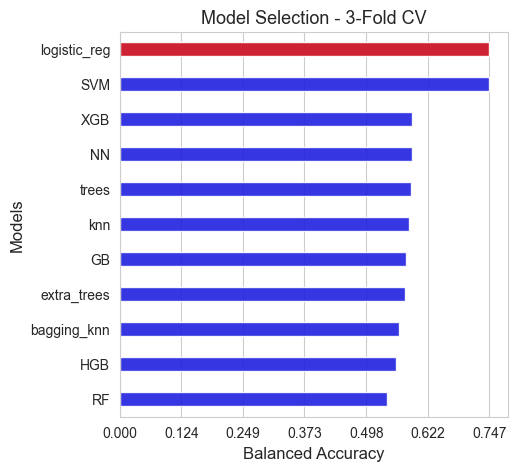

In [ ]:
fig, axes = plt.subplots(figsize=(5,5))

ax = sns.barplot(y=list(sorted_models), x=list(sorted_scores), color='blue', width=0.4, alpha=0.9)
ax = sns.barplot(y=[best_model], x=[score_best_model], color='red', width=0.4, alpha=0.9)

ax.set_ylabel('Models', size=12)
ax.set_xlabel('Balanced Accuracy', size=12)
ax.set_xticks(np.round(np.linspace(0, np.max(inner_score_values), 7),3)) 
ax.tick_params(axis='y', labelsize=10)    
plt.title('Model Selection - 3-Fold CV', size=13)

plt.show()

In [ ]:
best_model

'logistic_reg'

The best model is logistic regression, but the performance of linear SVM is practically the same. The rest of the models are far away from them. This is probably due to we are facing an imbalanced classification problem and the models al re failing predicting the minority class. 

We have to highlight that these two models are assigning a weight to each observation defined as the relative frequency of the class that they belong to. Both estimators have the parameter `class_weight` that controls this (we have set it as 'balanced').

Is important to notice that we are using the balanced accuracy as metric and not the normal accuracy, since the first one is the suitable one for this type of problems, and the second one is completely biased by the results oin the majority class, specially in binary classification problems like this.

We can check which are the parameters of the best alternative (pipeline).

In [18]:
best_params[2][best_model]

{'preprocessing__quant__scaler__apply': True,
 'preprocessing__cat__encoder__method': 'one-hot',
 'preprocessing__cat__imputer__apply': True,
 'preprocessing__quant__imputer__apply': True,
 'features_selector__apply': True,
 'features_selector__method': 'Fdr_f_class',
 'preprocessing__quant__scaler__method': 'standard',
 'preprocessing__quant__imputer__method': 'iterative_median',
 'preprocessing__cat__imputer__method': 'simple_most_frequent',
 'preprocessing__quant__imputer__n_nearest_features': 6,
 'logistic_reg__penalty': 'l2',
 'logistic_reg__C': 1.3338418110720158,
 'logistic_reg__class_weight': 'balanced'}

### **Applying outer evaluation**

#### **Estimation of future performance**

- **Estimation performance of the best model (Logistic Regression)**

In [20]:
pipelines[best_model].set_params(**best_params[2][best_model])
pipelines[best_model].fit(X=X_train, y=Y_train)
Y_test_hat_LR = pipelines[best_model].predict(X=X_test)
estimation_future_performance_LR = balanced_accuracy_score(y_pred=Y_test_hat_LR, y_true=Y_test)
estimation_future_performance_LR

0.7529345548133539

We can ckeck which features have been selected by the best pipeline as follows:

In [ ]:
pipelines[best_model]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   imputer()),
                                                                  ('scaler',
                                                                   scaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   encoder()),
                                                                  ('imputer',
                                                                   imputer())]),
                                                  ['HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('features_selector', features_selector(cv=2, k=10, n_jobs=-1)),
                ('logistic_reg',
                 LogisticRegression(max_iter=250, random_state=123,
                                    solver='saga'))])

In [ ]:
selected_features = pipelines[best_model].steps[1][1].features_selector_.get_support(indices=True)
selected_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56,
       58, 59, 60, 61, 62, 63, 64, 66, 67], dtype=int64)

All the features have been selected, so the feature selector applied in this case has selected nothing.

- **Estimation performance of a bad model**

In [37]:
pipelines['RF'].set_params(**best_params[2]['RF'])
pipelines['RF'].fit(X=X_train, y=Y_train)
Y_test_hat_RF = pipelines['RF'].predict(X=X_test)
estimation_future_performance_RF = balanced_accuracy_score(y_pred=Y_test_hat_RF, y_true=Y_test)
estimation_future_performance_RF

0.5456080705486692

As you can see the future performance of a bad model (any different to logistic regression or svm) is quite poor..

#### **Confusion matrix**

**Confusion matrix of the best model**

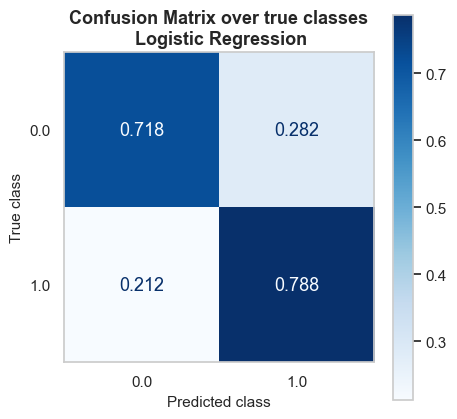

In [26]:
cm = confusion_matrix(y_pred=Y_test_hat_LR, y_true=Y_test, normalize='true', labels=pipelines[best_model].classes_)
# normalize='true' to normalize over the rows (true classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelines[best_model].classes_)

fig, axs = plt.subplots(figsize=(5,5))
disp.plot(ax=axs, cmap=plt.cm.Blues, values_format='.3f', text_kw={'fontsize': 13})
plt.title('Confusion Matrix over true classes\n Logistic Regression', weight='bold', fontsize=13)
axs.set_xlabel('Predicted class', size=11)
axs.set_ylabel('True class', size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)
plt.show()

From the confusion matrix we can compute several metrics directly:

- Balanced accuracy:

In [39]:
# Balanced accuracy
(0.718 + 0.788) / 2 # = 0.719*0.5 + 0.777*0.5

0.753

In [21]:
balanced_accuracy_score(y_pred=Y_test_hat_LR, y_true=Y_test)

0.7529345548133539

- Not balanced accuracy:

In [ ]:
values, counts = np.unique(Y_test, return_counts=True)
rel_freq = counts / np.sum(counts)
rel_freq

array([0.8637023, 0.1362977])

In [40]:
# Accuracy (not balanced)
0.718*0.86 + 0.788*0.14

0.7277999999999999

In [22]:
accuracy_score(y_pred=Y_test_hat_LR, y_true=Y_test)

0.7277199621570483

- Specificity: 0.719

- Sensitivity (recall): 0.788

In [33]:
recall_score(y_pred=Y_test_hat_LR, y_true=Y_test)

0.7875983341045812

Now we compute the confusion matrix over the predicted classes to get more metrics.

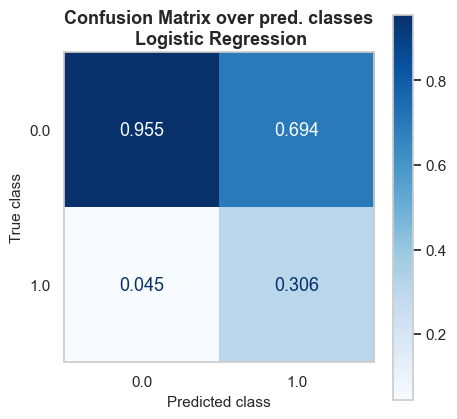

In [25]:
cm = confusion_matrix(y_pred=Y_test_hat_LR, y_true=Y_test, normalize='pred', labels=pipelines[best_model].classes_)
# normalize='pred' to normalize over the columns (predicted classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelines[best_model].classes_)

fig, axs = plt.subplots(figsize=(5,5))
disp.plot(ax=axs, cmap=plt.cm.Blues, values_format='.3f', text_kw={'fontsize': 13})
plt.title('Confusion Matrix over pred. classes\n Logistic Regression', weight='bold', fontsize=13)
axs.set_xlabel('Predicted class', size=11)
axs.set_ylabel('True class', size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)
plt.show()

- Precision: 0.306

In [35]:
precision_score(y_pred=Y_test_hat_LR, y_true=Y_test)

0.3061151079136691

- Negative predictive value: 0.955

- F1 score:

In [30]:
f1_score(y_pred=Y_test_hat_LR, y_true=Y_test)

0.4408755342572206

In [43]:
# Harmonic mean between sensitivity (recall) and precision
2 / (1/ 0.788 + 1/0.306)

0.4408190127970749

**Confusion matrix of a bad model**

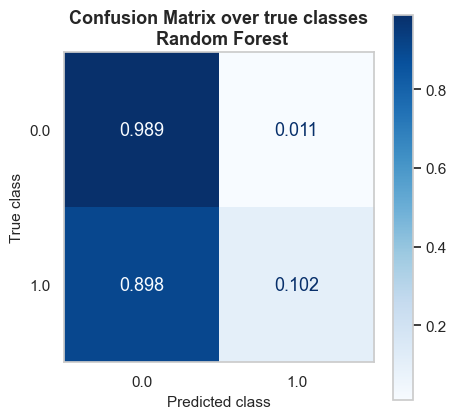

In [38]:
cm = confusion_matrix(y_pred=Y_test_hat_RF, y_true=Y_test, normalize='true', labels=pipelines['RF'].classes_)
# normalize='true' to normalize over the rows (true classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelines['RF'].classes_)

fig, axs = plt.subplots(figsize=(5,5))
disp.plot(ax=axs, cmap=plt.cm.Blues, values_format='.3f', text_kw={'fontsize': 13})
plt.title('Confusion Matrix over true classes\n Random Forest', weight='bold', fontsize=13)
axs.set_xlabel('Predicted class', size=11)
axs.set_ylabel('True class', size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)
plt.show()

From the confusion matrix we can compute several metrics directly:

- Balanced accuracy:

In [ ]:
# Balanced accuracy
(0.986 + 0.126) / 2 # = 0.719*0.5 + 0.777*0.5

0.556

- Not balanced accuracy:

In [ ]:
# Accuracy (not balanced)
0.986*0.86 + 0.126*0.14

0.8655999999999999

The difference between the balanced and not balanced accuracy lies in how they handle class imbalance. Balanced accuracy is useful when there is class imbalance in the dataset, as it provides an equitable measure of model performance across all classes. Unbalanced accuracy can be misleading in the presence of imbalanced classes, as it may be dominated by the majority class. 

(Unbalanced) Accuracy is completely biased in imbalanced classification problems. 

Moreover, when the problem is not imbalanced both metrics are the same, so, in any scenario, the best option is using balanced accuracy.

- Specificity: 0.989

- Sensitivity (recall): 0.102

In [41]:
recall_score(y_pred=Y_test_hat_RF, y_true=Y_test)

0.1018047200370199

Now we compute the confusion matrix over the predicted classes to get more metrics.

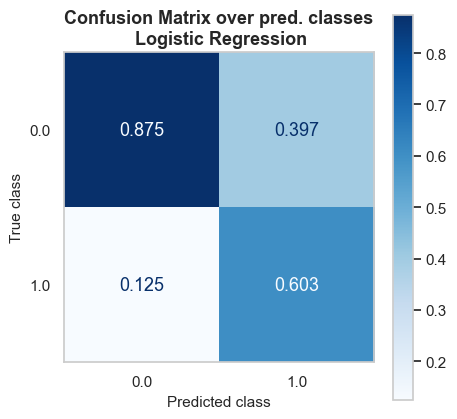

In [42]:
cm = confusion_matrix(y_pred=Y_test_hat_RF, y_true=Y_test, normalize='pred', labels=pipelines['RF'].classes_)
# normalize='pred' to normalize over the columns (predicted classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipelines['RF'].classes_)

fig, axs = plt.subplots(figsize=(5,5))
disp.plot(ax=axs, cmap=plt.cm.Blues, values_format='.3f', text_kw={'fontsize': 13})
plt.title('Confusion Matrix over pred. classes\n Logistic Regression', weight='bold', fontsize=13)
axs.set_xlabel('Predicted class', size=11)
axs.set_ylabel('True class', size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)
plt.show()

- Precision: 0.603

- Negative predictive value: 0.875

- F1 score:

In [46]:
f1_score(y_pred=Y_test_hat_RF, y_true=Y_test)

0.17418844022169439

In [47]:
# Harmonic mean between sensitivity (recall) and precision
2 / (1/ 0.102 + 1/0.603)

0.1744851063829787

### **Improving the performance using `imblearn`**

`imblearn` library relying on scikit-learn and provides tools when dealing with classification with imbalanced classes.

The main techniques that we are going to use to improve the performance of the algorithms in imbalanced classification problems are under and over sampling. These techniques will help us to balance the class distribution and potentially improve model accuracy.

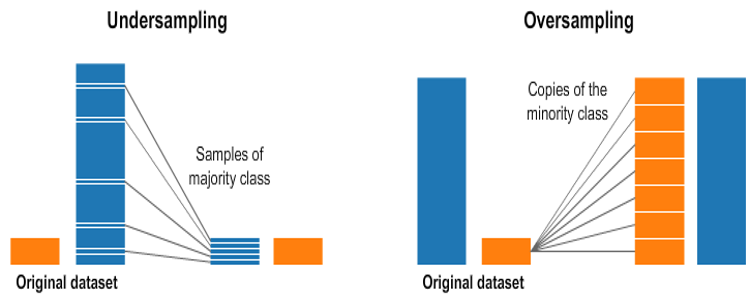

In [49]:
Image.open('images/over_under_sampling.png').resize((750, 300))

In the below part we are going to follow the same steps as we follow in the above part, so that we are not going to repeat the comments.

#### **Pipelines**

In [ ]:
quant_pipeline = Pipeline([
    ('imputer', imputer()),
    ('scaler', scaler())
    ])

cat_pipeline = Pipeline([
    ('encoder', encoder()), # encoding the categorical variables is needed by some imputers
    ('imputer', imputer())
    ])

quant_cat_processing = ColumnTransformer(transformers=[('quant', quant_pipeline, quant_predictors),
                                                       ('cat', cat_pipeline, cat_predictors)])

In [ ]:
# Defining dictionaries to save important objects:
inner_score, best_params, inner_results, imb_pipelines = {}, {}, {}, {}

model_keys = ['knn', 'trees', 'extra_trees',
              'RF', 'HGB', 'NN', 'SVM', 
              'XGB', 'logistic_reg']

models = [KNeighborsClassifier(n_jobs=-1), 
          DecisionTreeClassifier(random_state=123), 
          ExtraTreesClassifier(random_state=123),
          RandomForestClassifier(random_state=123), 
          HistGradientBoostingClassifier(random_state=123), 
          MLPClassifier(random_state=123),
          LinearSVC(random_state=123),  
          XGBClassifier(random_state=123),
          LogisticRegression(max_iter=250, solver='saga', random_state=123),
          ]

samplers_keys = ['random_under_sampler',
                 #'near_miss', # Bad performance
                 'random_over_sampler',
                 #'SMOTE', # Bad performance and too slow
                 #'SMOTETomek' # Bad performance and too slow
                 ]

samplers = [RandomUnderSampler(random_state=123), 
            #NearMiss(version=2),
            RandomOverSampler(random_state=123),
            #SMOTE(random_state=123),
            #SMOTETomek(random_state=123)
            ]

for key, model in zip(model_keys, models):

    imb_pipelines[key], inner_score[key], best_params[key], inner_results[key] = {}, {}, {}, {}

    for sampler_key, sampler in zip(samplers_keys, samplers): 
    
        imb_pipelines[key][sampler_key] = ImblearnPipeline([
                ('preprocessing', quant_cat_processing),
                (sampler_key, sampler),
                ('features_selector', features_selector(cv=2, k=10, n_jobs=-1)),
                (key, model) 
                ])

#### **Applying inner evaluation**

##### **Hyper-parameter optimization (HPO)**

In [ ]:
model_name = 'XGB'
param_grid = param_grid_XGB_refined

for sampler_name in samplers_keys:
    print(sampler_name)

    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                               inner=inner, 
                               param_grid=param_grid,
                               search_method='optuna',
                               scoring='balanced_accuracy', 
                               direction='maximize', 
                               n_trials=150, 
                               random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 18:26:52,054] A new study created in memory with name: no-name-f50bc19d-322c-457a-9099-e5f9253ca477


random_under_sampler


[I 2024-03-04 18:26:55,570] Trial 0 finished with value: 0.7203053346360856 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'XGB__max_depth': 15, 'XGB__reg_lambda': 0.013113110332485146, 'XGB__n_estimators': 170, 'XGB__eta': 0.028627615380173613, 'XGB__alpha': 0.236188847195606}. Best is trial 0 with value: 0.7203053346360856.
[I 2024-03-04 18:26:59,018] Trial 1 finished with value: 0.7096196034697796 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__im

random_over_sampler


[I 2024-03-04 18:32:20,464] Trial 0 finished with value: 0.6506687925488737 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'XGB__max_depth': 15, 'XGB__reg_lambda': 0.013113110332485146, 'XGB__n_estimators': 170, 'XGB__eta': 0.028627615380173613, 'XGB__alpha': 0.236188847195606}. Best is trial 0 with value: 0.6506687925488737.
[I 2024-03-04 18:32:28,626] Trial 1 finished with value: 0.6049632205887657 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__im

In [ ]:
model_name = 'logistic_reg'
param_grid = param_grid_logistic_regression_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=75, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 18:46:07,412] A new study created in memory with name: no-name-5f543a38-4fba-48a1-9386-5587a52a22d1


random_under_sampler


c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-03-04 18:46:12,500] Trial 0 finished with value: 0.7437523458742721 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preproces

random_over_sampler


c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-03-04 18:50:11,498] Trial 0 finished with value: 0.7460290590250972 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preproces

In [ ]:
model_name = 'SVM'
param_grid = param_grid_linear_SVM_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=75, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 19:20:05,541] A new study created in memory with name: no-name-945e4733-dfc9-4347-aee5-f742f9fa69ce


random_under_sampler


c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2024-03-04 19:20:07,770] Trial 0 finished with value: 0.7413138306180157 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'prepro

random_over_sampler


c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
[I 2024-03-04 19:24:33,511] Trial 0 finished with value: 0.7453199604110026 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'prepro

In [ ]:
model_name = 'RF'
param_grid = param_grid_RF_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=100, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 20:26:09,400] A new study created in memory with name: no-name-c5d36070-8130-4c6f-b04f-5556b3793729


random_under_sampler


[I 2024-03-04 20:26:17,248] Trial 0 finished with value: 0.7363141010672868 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'RF__n_estimators': 150, 'RF__max_depth': 30, 'RF__min_samples_split': 13, 'RF__min_samples_leaf': 14, 'RF__criterion': 'gini'}. Best is trial 0 with value: 0.7363141010672868.
[I 2024-03-04 20:26:23,319] Trial 1 finished with value: 0.727890237065175 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'feature

random_over_sampler


[I 2024-03-04 20:34:47,691] Trial 0 finished with value: 0.7348894213919763 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'RF__n_estimators': 150, 'RF__max_depth': 30, 'RF__min_samples_split': 13, 'RF__min_samples_leaf': 14, 'RF__criterion': 'gini'}. Best is trial 0 with value: 0.7348894213919763.
[I 2024-03-04 20:35:07,694] Trial 1 finished with value: 0.7275476417060124 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'featur

In [ ]:
model_name = 'NN'
param_grid = param_grid_MLP_NN_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    if 'under' in sampler_name:
        n_trials = 25
    else:
        n_trials = 5
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=n_trials, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 20:48:58,247] A new study created in memory with name: no-name-c3074479-7e2c-4499-b689-3546588cf286


random_under_sampler


c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-03-04 20:49:43,505] Trial 0 finished with value: 0.7404481507746686 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_

random_over_sampler


c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-03-04 21:20:49,426] Trial 0 finished with value: 0.7194649819558183 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__

In [ ]:
model_name = 'HGB'
param_grid = param_grid_HGB_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=75, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 21:40:28,212] A new study created in memory with name: no-name-4080d0c3-5a5a-49d2-9b58-461b2ce61a28


random_under_sampler


[I 2024-03-04 21:40:36,589] Trial 0 finished with value: 0.7391738458501335 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'HGB__max_depth': 20, 'HGB__l2_regularization': 0.15427557882405912, 'HGB__max_iter': 150}. Best is trial 0 with value: 0.7391738458501335.
[I 2024-03-04 21:40:41,504] Trial 1 finished with value: 0.7433180838692813 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_

random_over_sampler


[I 2024-03-04 21:46:19,189] Trial 0 finished with value: 0.7387466125975383 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'HGB__max_depth': 20, 'HGB__l2_regularization': 0.15427557882405912, 'HGB__max_iter': 150}. Best is trial 0 with value: 0.7387466125975383.
[I 2024-03-04 21:46:25,939] Trial 1 finished with value: 0.7437882105339327 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_

In [ ]:
model_name = 'trees'
param_grid = param_grid_trees_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=100, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 21:55:08,886] A new study created in memory with name: no-name-0e9302ef-4af9-41e2-bf1c-99653595c7f8


random_under_sampler


[I 2024-03-04 21:55:09,965] Trial 0 finished with value: 0.7130865919091264 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'trees__max_depth': 10, 'trees__min_samples_split': 17, 'trees__min_samples_leaf': 4, 'trees__splitter': 'best', 'trees__criterion': 'entropy'}. Best is trial 0 with value: 0.7130865919091264.
[I 2024-03-04 21:55:11,032] Trial 1 finished with value: 0.7204582043686805 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply

random_over_sampler


[I 2024-03-04 21:57:00,799] Trial 0 finished with value: 0.7090635435486744 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'trees__max_depth': 10, 'trees__min_samples_split': 17, 'trees__min_samples_leaf': 4, 'trees__splitter': 'best', 'trees__criterion': 'entropy'}. Best is trial 0 with value: 0.7090635435486744.
[I 2024-03-04 21:57:02,446] Trial 1 finished with value: 0.7172779248221314 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply

In [ ]:
model_name = 'knn'
param_grid = param_grid_knn_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=10, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 21:59:54,214] A new study created in memory with name: no-name-f0e451d4-abe6-426a-8e76-b5e4605aa03b


random_under_sampler


[I 2024-03-04 21:59:58,708] Trial 0 finished with value: 0.6625975146466697 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'knn__n_neighbors': 3, 'knn__metric': 'cityblock'}. Best is trial 0 with value: 0.6625975146466697.
[I 2024-03-04 22:00:09,916] Trial 1 finished with value: 0.7040577821118746 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'prepr

random_over_sampler


[I 2024-03-04 22:01:30,396] Trial 0 finished with value: 0.6105607545419764 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'knn__n_neighbors': 3, 'knn__metric': 'cityblock'}. Best is trial 0 with value: 0.6105607545419764.
[I 2024-03-04 22:02:35,764] Trial 1 finished with value: 0.6745123819921471 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'prepr

In [ ]:
model_name = 'extra_trees'
param_grid = param_grid_extra_trees_refined

for sampler_name in samplers_keys:
    print(sampler_name)
    
    simple_eval = SimpleEvaluation(estimator=imb_pipelines[model_name][sampler_name],  
                                inner=inner, 
                                param_grid=param_grid,
                                search_method='optuna',
                                scoring='balanced_accuracy', 
                                direction='maximize', 
                                n_trials=50, 
                                random_state=777)

    simple_eval.fit(X=X_train, Y=Y_train)

    inner_score[model_name][sampler_name] = simple_eval.inner_score
    best_params[model_name][sampler_name] = simple_eval.inner_best_params
    inner_results[model_name][sampler_name] = simple_eval.inner_results

[I 2024-03-04 22:11:53,131] A new study created in memory with name: no-name-938ab637-555a-46e0-b49d-c7b891553598


random_under_sampler


[I 2024-03-04 22:11:56,424] Trial 0 finished with value: 0.7029992621386949 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'extra_trees__n_estimators': 150, 'extra_trees__max_depth': 3, 'extra_trees__min_samples_split': 20, 'extra_trees__min_samples_leaf': 13, 'extra_trees__criterion': 'gini', 'extra_trees__max_features': 0.6}. Best is trial 0 with value: 0.7029992621386949.
[I 2024-03-04 22:11:59,624] Trial 1 finished with value: 0.7164376622540743 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat

random_over_sampler


[I 2024-03-04 22:16:56,883] Trial 0 finished with value: 0.7054872377343259 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat__imputer__apply': True, 'preprocessing__quant__imputer__apply': True, 'features_selector__apply': True, 'features_selector__method': 'Fdr_f_class', 'preprocessing__quant__imputer__method': 'iterative_median', 'preprocessing__cat__imputer__method': 'simple_most_frequent', 'preprocessing__quant__imputer__n_nearest_features': 6, 'extra_trees__n_estimators': 150, 'extra_trees__max_depth': 3, 'extra_trees__min_samples_split': 20, 'extra_trees__min_samples_leaf': 13, 'extra_trees__criterion': 'gini', 'extra_trees__max_features': 0.6}. Best is trial 0 with value: 0.7054872377343259.
[I 2024-03-04 22:17:14,122] Trial 1 finished with value: 0.7183148967130467 and parameters: {'preprocessing__quant__scaler__apply': False, 'preprocessing__cat__encoder__method': 'one-hot', 'preprocessing__cat

- Saving the results:

In [ ]:
# Saving the results as pickle files
'''
r = 3

with open(f'results/params_round_{r}', 'wb') as file:
    pickle.dump(best_params, file)

with open(f'results/inner_scores_round_{r}', 'wb') as file:
    pickle.dump(inner_score, file)

with open(f'results/results_round_{r}', 'wb') as file:
    pickle.dump(inner_results, file)
'''

- Opening the results

In [ ]:
r = 3

with open(f'results/params_round_{r}', 'rb') as file:
        best_params[r] = pickle.load(file)

with open(f'results/inner_scores_round_{r}', 'rb') as file:
        inner_score[r] = pickle.load(file)

with open(f'results/results_round_{r}', 'rb') as file:
            inner_results[r] = pickle.load(file)

##### **Selecting the best model**

In [ ]:
inner_score_values = np.array([inner_score[3][model][sampler] for model in inner_score[3].keys() for sampler in inner_score[3][model].keys()])
model_names = np.array([model + '_' + sampler for model in inner_score[3].keys() for sampler in inner_score[3][model].keys()])
best_model = model_names[np.argmax(inner_score_values)]
score_best_model = np.max(inner_score_values)

combined_models_score = list(zip(model_names, inner_score_values))
sorted_combined_models_score= sorted(combined_models_score, key=lambda x: x[1], reverse=True)  # Sort from greater to lower
sorted_models, sorted_scores = zip(*sorted_combined_models_score)

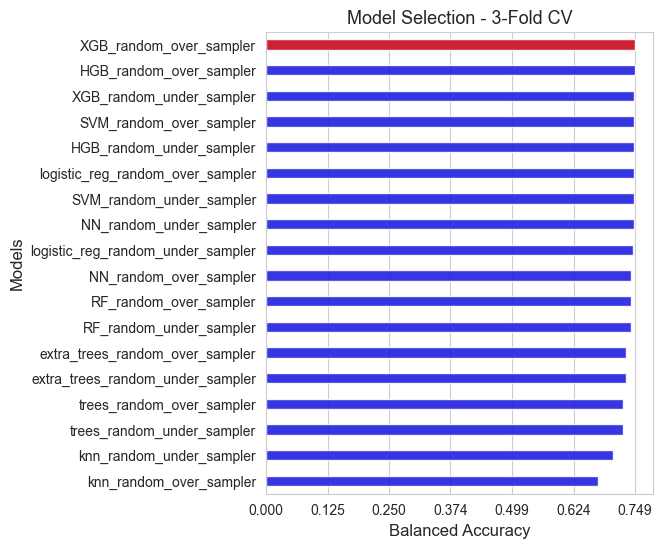

In [ ]:
fig, axes = plt.subplots(figsize=(5,6))

ax = sns.barplot(y=list(sorted_models), x=list(sorted_scores), color='blue', width=0.4, alpha=0.9)
ax = sns.barplot(y=[best_model], x=[score_best_model], color='red', width=0.4, alpha=0.9)

ax.set_ylabel('Models', size=12)
ax.set_xlabel('Balanced Accuracy', size=12)
ax.set_xticks(np.round(np.linspace(0, np.max(inner_score_values), 7),3)) 
ax.tick_params(axis='y', labelsize=10)    
plt.title('Model Selection - 3-Fold CV', size=13)

plt.show()

In [ ]:
best_model

'XGB_random_over_sampler'

As you can see the over/under sampling techniques have had a crucial impact in the results, increasing the balanced accuracy of all the models an average of 20% (approximately). Now we have a lot of models with a metric close to 0.75, that is the one obtained by logistic regression in the previous section (without using over/under sampling).

Another point to remark is that this sampling techniques seems not have any effect in those models that already worked well in the previous analysis (logistic regression and SVM), because them were already using their own over/under sampling effect assigning to each observation a the relative frequency of the class they belong to as weight.

Now the best model is XGBoost, but we said before, there are other models with a pretty similar performance.

In [ ]:
best_model_name = best_model.split('_')[0]
best_sampler_name = '_'.join(best_model.split('_')[1:])

In [ ]:
best_model_name

'XGB'

In [ ]:
best_sampler_name

'random_over_sampler'

#### **Applying outer evaluation**

##### **Estimation of future performance**

- **Estimation performance of the best model (XGB)**

In [ ]:
imb_pipelines[best_model_name][best_sampler_name].set_params(**best_params[3][best_model_name][best_sampler_name])
imb_pipelines[best_model_name][best_sampler_name].fit(X=X_train, y=Y_train)
Y_test_hat = imb_pipelines[best_model_name][best_sampler_name].predict(X=X_test)
estimation_future_performance = balanced_accuracy_score(y_pred=Y_test_hat, y_true=Y_test)
estimation_future_performance

0.7525094842538036

We can check the index of the selected features by this pipeline:

In [ ]:
selected_features = imb_pipelines[best_model_name][best_sampler_name].steps[2][1].features_selector_.get_support(indices=True)
selected_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], dtype=int64)

##### **Confusion matrix**

- **Confusion matrix of the best model**

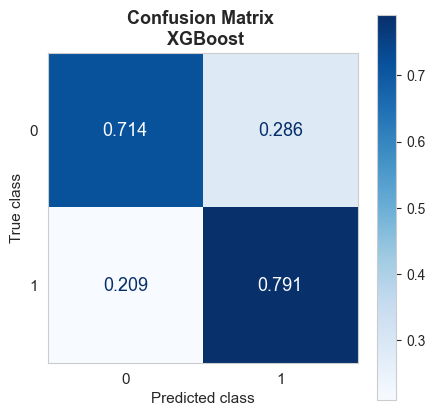

In [ ]:
cm = confusion_matrix(y_pred=Y_test_hat, y_true=Y_test, normalize='true', labels=imb_pipelines[best_model_name][best_sampler_name].classes_)
# normalize='true' to normalize over the rows (true classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=imb_pipelines[best_model_name][best_sampler_name].classes_)

fig, axs = plt.subplots(figsize=(5,5))
disp.plot(ax=axs, cmap=plt.cm.Blues, values_format='.3f', text_kw={'fontsize': 13})
plt.title('Confusion Matrix \n XGBoost', weight='bold', fontsize=13)
axs.set_xlabel('Predicted class', size=11)
axs.set_ylabel('True class', size=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(False)
plt.show()

### **Trying with Sequential Feature Selection based on Logistic Regression**

In this section we are going to try several pipelines that incorporate sequential feature selection based on the logistic regression model (both backward and forward algorithms will be applied). 

The idea is tu apply an strong feature selection method (a method that usually selects features) and see what happens with their inner performance, to compere them with the previous results. 

The estimators for those pipelines will be the best one of each of the previous round, namely, Logistic Regression and XGBoost. This estimators (o better said, pipelines) will be trained with their corresponding best params (the ones obtained in the third round, the previous one).

In [ ]:
selected_features, inner_score[4], best_params[4] = {}, {}, {}

In [ ]:
# We are going to use over sampler as sampling method, in order not to make the process more complex

for model in ['XGB', 'logistic_reg']:
    print(model)
    for feature_method in ['forward', 'backward']:
        print(feature_method)

        params = best_params[3][model]['random_over_sampler']
        params.update({'preprocessing__cat__encoder__method': 'ordinal'})
        params.update({'features_selector__method': f'{feature_method}_logistic_regression'})
        params.update({'features_selector__cv': 3})
        imb_pipelines[model]['random_over_sampler'].set_params(**params)

        # Equivalent way to do this using the pipelines properties
        '''
        imb_pipelines[model]['random_over_sampler'].set_params(**best_params[3][model]['random_over_sampler'])
        pipelines['logistic_reg'].set_params(preprocessing__cat__encoder__method = 'ordinal')
        pipelines['logistic_reg'].set_params(features_selector__method = f'{feature_method}_logistic_regression')
        pipelines['logistic_reg'].set_params(features_selector__cv = 3)
        '''

        imb_pipelines[model]['random_over_sampler'].fit(X=X_train, y=Y_train)
        selected_features_ = imb_pipelines[model]['random_over_sampler'].steps[2][1].features_selector_.get_support(indices=True)
        selected_features[f'{model}_{feature_method}'] = np.array(diabetes_df[predictors].columns)[selected_features_]

        inner_score[4][f'{model}_{feature_method}']= np.mean(cross_val_score(X=X_train, y=Y_train, 
                                                                        estimator=imb_pipelines[model]['random_over_sampler'], 
                                                                        scoring='balanced_accuracy', cv=inner))
        
        best_params[4][f'{model}_{feature_method}'] = params


We save the obtained results to be used in below sections.

In [ ]:
# Saving the results as pickle files
'''
r = 4

with open(f'results/params_round_{r}', 'wb') as file:
    pickle.dump(best_params[r], file)

with open(f'results/inner_scores_round_{r}', 'wb') as file:
    pickle.dump(inner_score[r], file)

with open(f'results/selected_features', 'wb') as file:
    pickle.dump(selected_features, file)
'''

### **Trying with Stacking**

With the same spirit as in the previous section we are going to try and extra alternative, one that uses stacking algorithm as estimator. 

We are going to try with different base models (SVM-XGBoost and NN-XGBoost) but the same meta-model (logistic regression).

The params for the base models (better said, pipelines) will be set with the best params obtained in the third round, and for the meta-model (pipeline) the second round best params will be used.

In [ ]:
inner_score[5], best_params[5] = {}, {}

- Defining the base models

In [ ]:
base_models_SVM_XGB = [
    ('SVM', imb_pipelines['SVM']['random_over_sampler'].set_params(**best_params[3]['SVM']['random_over_sampler'])),
    ('XGB',  imb_pipelines['XGB']['random_over_sampler'].set_params(**best_params[3]['XGB']['random_over_sampler']))
]

base_models_NN_XGB = [
    ('NN', imb_pipelines['NN']['random_under_sampler'].set_params(**best_params[3]['NN']['random_under_sampler'])),
    ('XGB',  imb_pipelines['XGB']['random_over_sampler'].set_params(**best_params[3]['XGB']['random_over_sampler']))
]

- Defining the stacking estimators

In [ ]:
logistic_params = {key.split('__')[1]: value for key, value in best_params[2]['logistic_reg'].items() if 'logistic' in key}

In [ ]:
stacking_SVM_XGB = StackingClassifier(estimators=base_models_SVM_XGB, 
                   final_estimator=LogisticRegression().set_params(**logistic_params), 
                   cv=5)

In [ ]:
stacking_NN_XGB = StackingClassifier(estimators=base_models_NN_XGB, 
                   final_estimator=LogisticRegression().set_params(**logistic_params), 
                   cv=5)

- Computing the inner score of each stacking estimator

In [ ]:
inner_score[5]['stacking_SVM_XGB'] = np.mean(cross_val_score(X=X_train, y=Y_train, 
                                                            estimator=stacking_SVM_XGB, 
                                                            scoring='balanced_accuracy', cv=inner))

c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python

In [ ]:
inner_score[5]['stacking_NN_XGB'] = np.mean(cross_val_score(X=X_train, y=Y_train, 
                                                            estimator=stacking_NN_XGB, 
                                                            scoring='balanced_accuracy', cv=inner))

c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\fscielzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

- Saving the results

In [ ]:
inner_score[5]

{'stacking_SVM_XGB': 0.720075514707991, 'stacking_NN_XGB': 0.7196399122838736}

In [ ]:
# Saving the results as pickle files
'''
r = 5

with open(f'results/params_round_{r}', 'wb') as file:
    pickle.dump(best_params[r], file)

with open(f'results/inner_scores_round_{r}', 'wb') as file:
    pickle.dump(inner_score[r], file)

'''


### **Selecting the best overall model**

In this section we are going to compare the inner performance of all the tried alternatives.

In [51]:
# Opening the results
best_params, inner_score = {},{}

for r in [2,3,4,5]:

    with open(f'results/params_round_{r}', 'rb') as file:
            best_params[r] = pickle.load(file)

    with open(f'results/inner_scores_round_{r}', 'rb') as file:
            inner_score[r] = pickle.load(file)

In [52]:
# Preprocessing the information to build a comparative plot
inner_score_values, best_params_values, model_names = {}, {}, {}

for r in [2,4,5]: 
    inner_score_values[r] = list(inner_score[r].values())
    best_params_values[r] = list(best_params[r].values())
    model_names[r] = list(inner_score[r].keys())

inner_score_values[3] = [inner_score[3][model][sampler] for model in inner_score[3].keys() for sampler in inner_score[3][model].keys()]
best_params_values[3] = [best_params[3][model][sampler] for model in best_params[3].keys() for sampler in best_params[3][model].keys()]
model_names[3] = [model + '_' + sampler for model in inner_score[3].keys() for sampler in inner_score[3][model].keys()]

inner_score_values_ = np.array(inner_score_values[2] + inner_score_values[3] + inner_score_values[4] + inner_score_values[5])
best_params_values_ = np.array(best_params_values[2] + best_params_values[3] + best_params_values[4])
model_names_ = np.array(model_names[2] + model_names[3] + model_names[4] +  model_names[5])

best_model_all = model_names_[np.argmax(inner_score_values_)]
score_best_model_all = np.max(inner_score_values_)

combined_models_score = list(zip(model_names_, inner_score_values_))
sorted_combined_models_score= sorted(combined_models_score, key=lambda x: x[1], reverse=True)  # Sort from greater to lower
sorted_models, sorted_scores = zip(*sorted_combined_models_score)

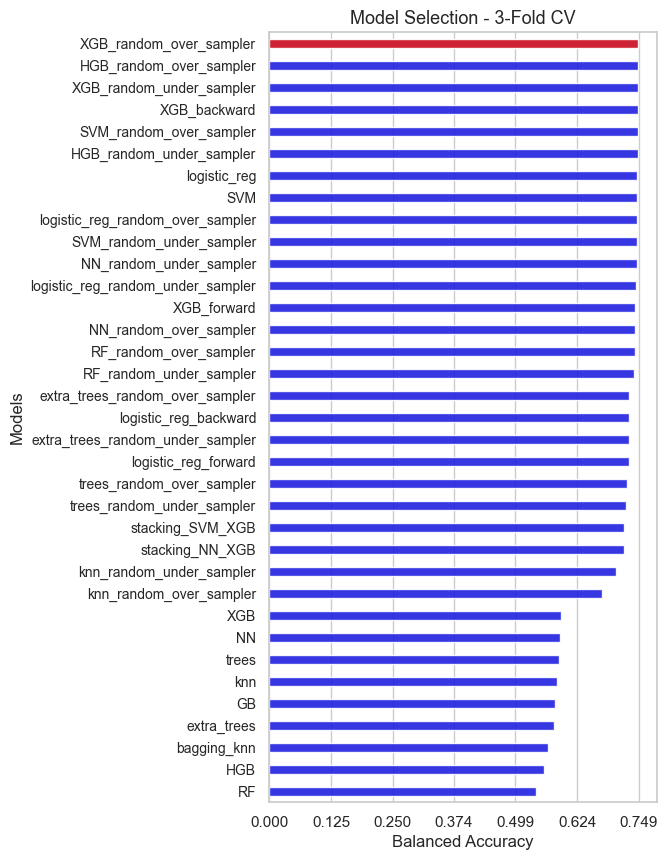

In [53]:
fig, axes = plt.subplots(figsize=(5,10))

ax = sns.barplot(y=list(sorted_models), x=list(sorted_scores), color='blue', width=0.4, alpha=0.9)
ax = sns.barplot(y=[best_model_all], x=[score_best_model_all], color='red', width=0.4, alpha=0.9)

ax.set_ylabel('Models', size=12)
ax.set_xlabel('Balanced Accuracy', size=12)
ax.set_xticks(np.round(np.linspace(0, np.max(inner_score_values_), 7),3)) 
ax.tick_params(axis='y', labelsize=10)    
plt.title('Model Selection - 3-Fold CV', size=13)

plt.show()

The top-performing model is the `'XGB_random_over_sampler'`, closely followed by the `'HGB_random_over_sampler'` model, with balanced accuracy scores of approximately **0.748**. These models utilize random oversampling to address class imbalance, which appears to have positively influenced their performance.

The plot also includes results for different feature selection methods *(forward and backward)* applied to XGBoost and Logistic Regression, as well as stacking models that combine SVM and XGBoost or NN and XGBoost. While these approaches show good performance, they do not outperform the leading models. 

In [ ]:
best_model_all

'XGB_random_over_sampler'

In [54]:
# We can gather all the information in the same dictionaries
inner_score_all, best_params_all = {}, {}
inner_score_all = dict(zip(model_names_, inner_score_values_))
best_params_all = dict(zip(model_names_, best_params_values_))

We can see the parameters of the best overall pipeline:

In [55]:
best_params_all[best_model_all]

{'preprocessing__quant__scaler__apply': False,
 'preprocessing__cat__encoder__method': 'one-hot',
 'preprocessing__cat__imputer__apply': True,
 'preprocessing__quant__imputer__apply': True,
 'features_selector__apply': True,
 'features_selector__method': 'Fdr_f_class',
 'preprocessing__quant__imputer__method': 'iterative_median',
 'preprocessing__cat__imputer__method': 'simple_most_frequent',
 'preprocessing__quant__imputer__n_nearest_features': 6,
 'XGB__max_depth': 3,
 'XGB__reg_lambda': 0.062444976756626386,
 'XGB__n_estimators': 170,
 'XGB__eta': 0.09498009017491364,
 'XGB__alpha': 0.15054242055078138}

In conclusion, the first part of this analysis involved an extensive evaluation of various machine learning models and techniques to handle class imbalance, including hyperparameter optimization, feature selection methods, and ensemble strategies like stacking. The comparison of models based on 3-fold cross-validation resulted in the selection of the `'XGB_random_over_sampler'` model as the top performer in terms of balanced accuracy. This model, an XGBoost classifier with random oversampling, strikes the best balance between correctly predicting both classes. 


### **Probabilistic predictions**

In this section we are going to make probabilistic predictions of the response using the logistic regression model. That is, we are going to estimate the risk of diabetes disease for the testing patients. 

A table comparing the true classes vs predicted probabilities for each class vs predicted classes will be displayed.

In [130]:
logistic_regression = pipelines['logistic_reg'].set_params(**best_params_all['logistic_reg'])
logistic_regression.fit(X=X_train, y=Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   imputer(method='iterative_median',
                                                                           n_nearest_features=6)),
                                                                  ('scaler',
                                                                   scaler(apply=True))]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   encoder(method='one-hot')),
                                                                  ('imputer',
                                                                   imputer(method='simple_most_frequent'))]),
                                                  ['HighBP', 'High...
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('features_selector',
                 features_selector(apply=True, cv=2, k=10, method='Fdr_f_class',
                                   n_jobs=-1)),
                ('logistic_reg',
                 LogisticRegression(C=1.3338418110720158,
                                    class_weight='balanced', max_iter=250,
                                    random_state=123, solver='saga'))])

In [136]:
Y_test_hat = logistic_regression.predict(X=X_test)

In [135]:
Y_test_hat_prob = logistic_regression.predict_proba(X=X_test)

In [138]:
pl.DataFrame({'Y_test': Y_test, 'predicted_prob_0': Y_test_hat_prob[:,0],
              'predicted_prob_1': Y_test_hat_prob[:,1], 'Y_test_hat': Y_test_hat})

Y_test,predicted_prob_0,predicted_prob_1,Y_test_hat
f64,f64,f64,f64
0.0,0.951446,0.048554,0.0
0.0,0.84114,0.15886,0.0
0.0,0.606068,0.393932,0.0
0.0,0.711302,0.288698,0.0
1.0,0.347687,0.652313,1.0
0.0,0.567142,0.432858,0.0
0.0,0.449898,0.550102,1.0
0.0,0.877387,0.122613,0.0
0.0,0.60967,0.39033,0.0


### **Saving the best model**

Once we have a best model we can save it as a pretrained model, that is, as a model that have been already trained and is ready to make predictions for new data.

Despite the best model was XGboost, we use here Logistic Regression because its performance is almost the same.

- Train the model with all the available data


In [140]:
logistic_regression = pipelines['logistic_reg'].set_params(**best_params_all['logistic_reg'])
logistic_regression.fit(X=X, y=Y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('quant',
                                                  Pipeline(steps=[('imputer',
                                                                   imputer(method='iterative_median',
                                                                           n_nearest_features=6)),
                                                                  ('scaler',
                                                                   scaler(apply=True))]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   encoder(method='one-hot')),
                                                                  ('imputer',
                                                                   imputer(method='simple_most_frequent'))]),
                                                  ['HighBP', 'High...
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'DiffWalk', 'Sex', 'Age',
                                                   'Education', 'Income'])])),
                ('features_selector',
                 features_selector(apply=True, cv=2, k=10, method='Fdr_f_class',
                                   n_jobs=-1)),
                ('logistic_reg',
                 LogisticRegression(C=1.3338418110720158,
                                    class_weight='balanced', max_iter=250,
                                    random_state=123, solver='saga'))])

- Save the model using `joblib` library

In [141]:
joblib.dump(logistic_regression, "results/final_model.joblib")

['results/final_model.joblib']

### **Predicting new data**

We can load the saved model as follows:

In [147]:
final_model = joblib.load("results/final_model.joblib")

Imagine that new data comes, but new data only for the predictors, since what we want to predict (the response) is unknown, otherwise it wouldn't be necessary to predict it.

We read this new data and use our pretrained model for making predictions for the new data.

In [148]:
X_new = pd.read_csv('diabetes_new.csv')

In [ ]:
Y_new_hat = final_model.predict(X=X_new)

In [149]:
Y_new_hat

array([1., 0., 0., ..., 0., 1., 0.])

We cannot compute any accuracy metric to see how well the model is predicting the new data since we have not new data for the response variable, what is common in a realistic scenario.

## **Interpretation with Logistic Regression**

In this section we are going to make inference/interpretations with the Logistic Regression model. We want to take advantage of the statistical capabilities of this model that allow us to analyze the relationship between the response and the prediction by mean of the (beta) coefficient of the model.

To carry out this analysis we are going to rely on the features selected by sequential feature selection based on Logistic Regression as well. This features are the most important ones from a predictive perspective according to the Logistic Regression model.

In this section `statsmodels` framework will be used since is more suitable for making statistical inference and interpretations, since the summary of the model that it provides is much more appropriate for this task.

In the below code we prepare the pipeline to be used.

In [ ]:
with open(f'results/selected_features', 'rb') as file:
    selected_features = pickle.load(file)

We define the data to be used.

In [ ]:
predictors = selected_features['logistic_reg_backward']
# we use str() because the elements of predictors array are numpy str which are not compatible with sklearn ColumnTransform
quant_predictors = [str(col) for col in predictors if col in quant_columns]
cat_predictors = [str(col) for col in predictors if col in cat_columns]

Y = diabetes_df[response].to_pandas()
X = diabetes_df[predictors].to_pandas()
# The Null values of the Polars columns that are define as Object type by Pandas are treated as None and not as NaN (that is what we want)
# The avoid this behavior the next step is necessary
X = X.fillna(value=np.nan)

enc = OrdinalEncoder()
Y = enc.fit_transform(Y.to_numpy().reshape(-1, 1)).flatten()

We define the preprocessing pipeline to be used. 

In [ ]:
quant_pipeline = Pipeline([
    ('imputer', imputer(apply=True, method='iterative_median'))
    ])

cat_pipeline = Pipeline([
    ('encoder', encoder(method='ordinal')),
    ('imputer', imputer(apply=True, method='simple_most_frequent'))
    ])

quant_cat_processing = ColumnTransformer(transformers=[('quant', quant_pipeline, quant_predictors),
                                                       ('cat', cat_pipeline, cat_predictors)])

interpretation_pipeline = Pipeline([('preprocessing', quant_cat_processing)])

We apply the preprocessing pipeline to the predictors matrix, convert it into a `pandas` data-frame (sth needed by `statsmodels`), define the categorical columns as `category` type (to be read by `statsmodels` as categorical features), define the dummies associated to the categorical variables (one-hot encoding), and add the intercept.

In [ ]:
X = interpretation_pipeline.fit_transform(X=X)
X = pd.DataFrame(X)
X.columns = quant_predictors + cat_predictors
for col in cat_predictors:
    X[col] = X[col].astype('category')
X_dummies = pd.get_dummies(X[cat_predictors], drop_first=True, dtype=int)
X = pd.concat([X[quant_predictors], X_dummies], axis=1)
X = sm.add_constant(X)

We fit the model and print its summary:

In [ ]:
model = sm.Logit(Y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.335306
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253651
Method:                           MLE   Df Model:                           28
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.1695
Time:                        09:13:55   Log-Likelihood:                -85060.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.1269      0.124    -49.530      0.000      -6.369      -5.884
BMI           

The logistic regression model has been successfully fitted to the data with the following key results:

1. The model used $253,680$ observations to estimate coefficients for **28** predictors after adding a constant term.

2. The Pseudo R-squared value is $0.1695$, indicating that around **16.95%** of the variance in the response variable is explained by the model.

3. The coefficients' z-scores and their corresponding p-values suggest which variables are statistically significant predictors of the outcome. For instance:

   - `HighBP_1.0` has a positive coefficient of $1.0051$, with a p-value close to zero, indicating a strong and significant association with the outcome.

   - Age groups (`Age_1.0` through `Age_12.0`) show increasing coefficients, suggesting higher odds of diabetes as age increases, with most age groups significantly different from the baseline category.
   
   - Income levels (`Income_1.0` through `Income_7.0`) are inversely related to the outcome, where higher income levels are associated with lower odds of diabetes, with higher income categories showing significant negative coefficients.

4. The Log-Likelihood of the model is $-85,060$, and the LL-Null is $-102,420$, which suggests that the model fits better than a null model with no predictors.

5. All variables have confidence intervals that do not cross zero, except for `Smoker_1.0`, `Age_1.0`, and `Income_1.0`, which indicates uncertainty about the direction of their associations.

Overall, this model provides a statistically significant improvement over the null model, with several predictors showing strong associations with the probability of having diabetes. The results can inform healthcare strategies targeting the most influential factors associated with diabetes risk.

A more in-depth interpretation is provided in the next lines:

Now, we will be focus in the `coef` column of the summary, that contains the estimated values for the beta coefficients of the model. We will use them to make interpretations regarding how is the relationship between the responser and the given predictor.

**Interpreting `HighBP`: $\quad\widehat{\beta}_{HighBP} = 1 > 0$**

$$\dfrac{OR(x_{i} | x_{ij} = 1)}{OR(x_{i} | x_{ij} = 0)} = \dfrac{e^{\widehat{\eta}_i |x_{ijr} = 1} }{e^{\widehat{\eta}_i |x_{ij}=0}} = e^{\widehat{\eta}_i |x_{ijr} = 1 - \widehat{\eta}_i |x_{ij}=0} = e^{\widehat{\beta}_{jr}}$$


- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 2.71 times **greater** when the patient has high blood pressure (`HighBP=1`) than when not (`HighBP=0`).

In [ ]:
np.e**1

2.718281828459045

**Interpreting `BMI`: $\quad\widehat{\beta}_{BMI} = 0.065 > 0$**

$$\dfrac{OR(x_{i} | x_{ij}^\prime)}{OR(x_{i} | x_{ij})} =  \dfrac{e^{\widehat{\eta}_i |x'_{ij}} }{e^{\widehat{\eta}_i |x_{ij}}} = e^{\widehat{\eta}_i |x'_{ij} - \widehat{\eta}_i |x_{ij}} = e^{h\cdot \widehat{\beta}_j}$$

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.07 times **greater** when the body max index (`BMI`) of the patient increases in one unit. If it increases in 5 units, the possibility is 1.4 times greater.

In [ ]:
np.e**0.065

1.0671590243841926

In [ ]:
np.e**(5*0.065)

1.3840306459807514

**Interpreting `Smoker`: $\quad\widehat{\beta}_{Smoker} = 0.025 > 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.02 times **greater** if the patient is smoker (`Smoker=1`) than if not (`Smoker=0`).

In [ ]:
np.e**0.025

1.0253151205244289

**Interpreting `Stroke`: $\quad\widehat{\beta}_{Stroke} = 0.36 > 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.43 times **greater** if the patient had a stroke (`Stroke=1`) than if not (`Stroke=0`).

In [ ]:
np.e**0.36

1.4333294145603401

**Interpreting `Fruits`: $\quad\widehat{\beta}_{Fruits} = -0.083 < 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.09 times **lower** if the patient eats fruits every day (`Fruits=1`) than if not (`Fruits=0`).

In [ ]:
1/np.e**-0.083

1.0865418085482381

**Interpreting `NoDocbcCost`: $\quad\widehat{\beta}_{NoDocbcCost} = 0.055 > 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.06 times **greater** for patients who cannot afford medical visits sometimes  (`NoDocbcCost=1`) than for those that always can (`NoDocbcCost=0`). 

In [ ]:
np.e**0.055

1.0565406146754943

**Interpreting `PhysHlth`: $\quad\widehat{\beta}_{PhysHlth} = 0.015 > 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.02 times **greater** for patients who had one day of not good physical health in the las 30 days  (`PhysHlth=1`). For patients with 25 days of not good physical health (`PhysHlth=20`) the possibility is 1.45 times **greater**. 

In [ ]:
np.e**0.015

1.015113064615719

In [ ]:
np.e**(25*0.015)

1.4549914146182013

**Interpreting `DiffWalk`: $\quad\widehat{\beta}_{DiffWalk} = 0.41 > 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.5 times **greater** for patients with difficulties for walking  (`DiffWalk=1`) than for those without (`DiffWalk=0`). 

In [ ]:
np.e**0.41

1.5068177851128535

**Interpreting `Sex`: $\quad\widehat{\beta}_{Sex} = 0.31 > 0$**

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.36 times **greater** for male patients  (`Sex=1`) than for female patients (`Sex=0`). 

In [ ]:
np.e**0.31

1.3634251141321778

**Interpreting `Age`:**

$\widehat{\beta}_{Age1} = 0.19 > 0$

$\widehat{\beta}_{Age2} = 0.49 > 0$

$\widehat{\beta}_{Age3} = 1 > 0$

$\widehat{\beta}_{Age4} = 1.3 > 0$

$\widehat{\beta}_{Age5} = 1.54 > 0$

$\widehat{\beta}_{Age6} = 1.77 > 0$

$\widehat{\beta}_{Age7} = 1.9 > 0$

$\widehat{\beta}_{Age8} = 2.06 > 0$

$\widehat{\beta}_{Age9} = 2.28 > 0$

$\widehat{\beta}_{Age10} = 2.34 > 0$

$\widehat{\beta}_{Age11} = 2.27 > 0$

$\widehat{\beta}_{Age12} = 2.13 > 0$


 $$\dfrac{OR(x_{i} | x_{ijr} = 1)}{OR(x_{i} | x_{ij} = 0)} = \dfrac{e^{\widehat{\eta}_i |x_{ijr} = 1} }{e^{\widehat{\eta}_i |x_{ij}=0}} = e^{\widehat{\eta}_i |x_{ijr} = 1 - \widehat{\eta}_i |x_{ij}=0} = e^{\widehat{\beta}_{jr}} $$



$$\dfrac{OR(x_{i} | x_{ijr} = 1)}{OR(x_{i} | x_{ijc} = 1)} = \dfrac{OR(x_{i} | x_{ij} = r)}{OR(x_{i} | x_{ij} = c)} = \dfrac{e^{\widehat{\eta}_i |x_{ijr} = 1} }{e^{\widehat{\eta}_i |x_{ijc}=1}} = e^{\widehat{\eta}_i |x_{ijr} = 1 - \widehat{\eta}_i |x_{ijc}=1} = e^{\widehat{\beta}_{jr} - \widehat{\beta}_{jc}}$$

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 5.87 times **greater** for individuals with an `Age` in [50, 54] than for those with an `Age` in [18, 24].

In [ ]:
np.e**1.77

5.870853361382601

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 10.4 times **greater** for individuals with an `Age` in [70, 74] than for those with an `Age` in [18, 24].

In [ ]:
np.e**2.34

10.381236562731843

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.77 times **greater** for individuals with an `Age` in [70, 74] than for those with an `Age` in [50, 54].

In [ ]:
np.e**(2.34 - 1.77) 

1.7682670514337349

**Interpreting `Income`: $\quad\widehat{\beta}_{Income} = -0.11 < 0$**

$\widehat{\beta}_{Income1} = -0.033 < 0$

$\widehat{\beta}_{Income2} = -0.098 < 0$

$\widehat{\beta}_{Income3} = -0.16 < 0$

$\widehat{\beta}_{Income4} = -0.28 < 0$

$\widehat{\beta}_{Income5} = -0.41 < 0$

$\widehat{\beta}_{Income6} = -0.5 < 0$

$\widehat{\beta}_{Income7} = -0.74 < 0$

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.32 times **lower** for individuals with an `Income` in [25k, 35k] than for those with an `Income` lower than 10k.

In [ ]:
1/np.e**-0.28

1.3231298123374369

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 2.1 times **lower** for individuals with an `Income` higher than 75k than for those with an `Income` lower than 10k.

In [ ]:
1/np.e**-0.74

2.0959355144943643

- The possibility of having diabetes (`Diabetes=1`) with respect to not having (`Diabetes=0`) is 1.6  times **lower** for individuals with an `Income` higher than 75k than for those with an `Income` in [25k, 35k].

In [ ]:
1/np.e**(-0.74 - (-0.28))

1.5840739849944816

## **Conclusions**

As conclusions of the prediction part, we have tested a large number of different models. The main problem we have encountered has been class imbalance. There are models that by adjusting one of their parameters are able to work correctly with this problem. The ones that are not able to do it, we have had to apply oversampling and undersampling to see how they work with balanced classes. 

Applying the balancing techniques improves the results noticeably, increasing an average of 20% in general. Models that were able to work well with unbalanced classes did not experience any improvement.

Among all the possibilities, the one with the best results was XGBoost with balancing techniques, but logistic regression came very close. In the case of having to choose, this model would be more interesting as it allows not only to get very close to the result in terms of prediction, but also has that goodness in the part of interpretability as it appears in the last part of this work. It allows you to know the importance and degree to which each of the predictor variables affects the response variable.